# Mapping cultural remains with segmentation
All forests in Sweden, both managed forests and natural old-growth forests in national parks, contain a cultural
heritage. The long history of forest utilization in Sweden has left a rich legacy of diverse types of ancient
monuments and other kinds of cultural remains that document our relationship with the forest and its importance
for Sweden’s development. However, the cultural heritage is too often damaged in forestry operations. The aim of
the project is to do research and develop operationally useful maps that can be used
to identify, protect and enhance the cultural remains in Swedish forests, thereby reducing the destruction of
cultural heritage in our forest landscapes.

## Select LiDAR tiles which intersect field data


Create directories for the data

In [2]:
import os
os.mkdir('/workspace/temp_dir/')

In [ ]:
import os
os.mkdir('/workspace/data/charcoal_kilns/laz/')
os.mkdir('/workspace/temp_dir/')
os.mkdir('/workspace/data/charcoal_kilns/label_tiles/')
os.mkdir('/workspace/data/charcoal_kilns/topographical_indices_normalized/')
os.mkdir('/workspace/data/charcoal_kilns/topographical_indices_normalized/hillshade/')
os.mkdir('/workspace/data/charcoal_kilns/topographical_indices_normalized/slope/')
os.mkdir('/workspace/data/charcoal_kilns/topographical_indices_normalized/hpmf/')
os.mkdir('/workspace/data/charcoal_kilns/topographical_indices_normalized/stdon/')

os.mkdir('/workspace/data/charcoal_kilns/split_data/')
os.mkdir('/workspace/data/charcoal_kilns/split_data/labels/')
os.mkdir('/workspace/data/charcoal_kilns/split_data/slope/')
os.mkdir('/workspace/data/charcoal_kilns/split_data/hillshade/')
os.mkdir('/workspace/data/charcoal_kilns/split_data/hpmf/')
os.mkdir('/workspace/data/charcoal_kilns/split_data/stdon/')

os.mkdir('/workspace/data/logfiles/')

Create a tile fotprint of all laz tiles

<AxesSubplot:>

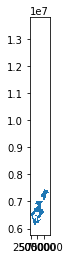

In [38]:
#!python /workspace/code/lidar_tile_footprint.py /workspace/lidar/pooled_laz_files/
import geopandas as gpd
sites = gpd.read_file('/workspace/lidar/none.shp')
#sites.crs = '3006'
sites.plot()

**Copy laz files that intersect with field hunting pits**

In [31]:
!pip install rtree
!python /workspace/code/create_aoi_poolygon.py /workspace/lidar/none.shp /workspace/data/hunting_pits/Fangstgrop_training_Holmen_Cissi_695st_220214.shp /workspace/lidar/pooled_laz_files/ /workspace/data/hunting_pits/laz/  

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
usage: create_aoi_poolygon.py [-h]
                              footprint field_data input_directory
                              output_directory
create_aoi_poolygon.py: error: unrecognized arguments: /workspace/data/hunting_pits/laz/footprint.shp


**Copy laz files that intersect with charcoal kilns pits**

**This is the footprint of the study area**

./whitebox_tools --run="LidarTileFootprint" --wd="/workspace/data/hunting_pits/laz" --output='/workspace/data/hunting_pits/laz/footprint.shp'



<AxesSubplot:>

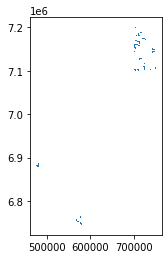

In [36]:
!python /workspace/code/lidar_tile_footprint.py /workspace/data/hunting_pits/laz/ /workspace/data/hunting_pits/laz/footprint.shp
import geopandas as gpd
sites = gpd.read_file('/workspace/data/hunting_pits/laz/footprint.shp')
sites.crs = '3006'
sites.plot()

## Convert LiDAR to DEM

In [72]:
!python /workspace/code/laz_to_dem.py /workspace/data/hunting_pits/laz/ /workspace/data/hunting_pits/dem_tiles/

['./whitebox_tools', '-v']
./whitebox_tools --run="LidarTinGridding" --wd="/workspace/data/hunting_pits/laz" --parameter=elevation --returns=last --resolution=0.5 --exclude_cls=0,1,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18 --max_triangle_edge_length='50'

*******************************
* Welcome to LidarTINGridding *
* Powered by WhiteboxTools    *
* www.whiteboxgeo.com         *
*******************************
Performing interpolation...
Finished 19F048_71050_7475_25.laz (1 of 66)
Progress: 0%
Finished 19G013_71800_7050_25.laz (2 of 66)
Progress: 1%
Finished 19G013_71875_7150_25.laz (3 of 66)
Progress: 3%
Finished 19F047_71150_7225_25.laz (4 of 66)
Progress: 4%
Finished 19F047_71425_7000_25.laz (5 of 66)
Progress: 6%
Finished 19F048_71025_7375_25.laz (6 of 66)
Progress: 7%
Finished 19G013_71575_7125_25.laz (7 of 66)
Progress: 9%
Finished 19G013_71975_7025_25.laz (8 of 66)
Progress: 10%
Finished 19F047_71025_7225_25.laz (9 of 66)
Progress: 12%
Finished 19G013_71725_7175_25.laz (10 of 66)

Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analysis: 21%
Performing analysis: 22%
Performing analysis: 23%
Performing analysis: 24%
Performing analysis: 25%
Performing analysis: 26%
Performing analysis: 27%
Performing analysis: 28%
Performing analysis: 29%
Performing analysis: 30%
Performing analysis: 31%
Performing analysis: 32%
Performing analysis: 33%
Performing analysis: 34%
Performing analysis: 35%
Performing analysis: 36%
Performing analysis: 37%
Performing analysis: 38%
Performing analysis: 39%
Performing analysis: 40%
Performing analysis: 41%
Performing analysis: 42%
Performing analysis: 43%
Performing analysis: 44%
Performing analysis: 45%
Performing analysis: 46%
Performing analysis: 47%
Performing analysis: 48%
Performing analysis: 49%
Performing analysis: 50%
Performing analysis: 51%
Performing analysis: 52%
Performing analysis: 53%


Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.912s
./whitebox_tools --run="FillMissingData" --wd="/workspace/data/hunting_pits/laz" --input='/workspace/data/hunting_pits/laz/19G013_71800_7050_25.tif' --output='/workspace/data/hunting_pits/dem_tiles/19G013_71800_7050_25.tif' --filter=5000 --weight=2.0

******************************
* Welcome to FillMissingData *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Reading data...
Interpolating data holes...
Interpolating data holes: 0%
Interpolating data holes: 1%
Interpolating data holes: 2%
Interpolating data holes: 3%
Interpolating data holes: 4%
Interpolating data holes: 5%
Interpolating data holes: 6%
Interpolating data holes: 7%
Interpolating data holes: 8%
Interpolating data holes: 9%
Interpolating data holes: 10%
Interpolating data holes: 11%
Interpolating data holes: 12%
Interpolating data holes: 13%
Interpolating data holes: 14%
Interpolati

Interpolating data holes: 54%
Interpolating data holes: 55%
Interpolating data holes: 56%
Interpolating data holes: 57%
Interpolating data holes: 58%
Interpolating data holes: 59%
Interpolating data holes: 60%
Interpolating data holes: 61%
Interpolating data holes: 62%
Interpolating data holes: 63%
Interpolating data holes: 64%
Interpolating data holes: 65%
Interpolating data holes: 66%
Interpolating data holes: 67%
Interpolating data holes: 68%
Interpolating data holes: 69%
Interpolating data holes: 70%
Interpolating data holes: 71%
Interpolating data holes: 72%
Interpolating data holes: 73%
Interpolating data holes: 74%
Interpolating data holes: 75%
Interpolating data holes: 76%
Interpolating data holes: 77%
Interpolating data holes: 78%
Interpolating data holes: 79%
Interpolating data holes: 80%
Interpolating data holes: 81%
Interpolating data holes: 82%
Interpolating data holes: 83%
Interpolating data holes: 84%
Interpolating data holes: 85%
Interpolating data holes: 86%
Interpolat

Performing analysis: 30%
Performing analysis: 31%
Performing analysis: 32%
Performing analysis: 33%
Performing analysis: 34%
Performing analysis: 35%
Performing analysis: 36%
Performing analysis: 37%
Performing analysis: 38%
Performing analysis: 39%
Performing analysis: 40%
Performing analysis: 41%
Performing analysis: 42%
Performing analysis: 43%
Performing analysis: 44%
Performing analysis: 45%
Performing analysis: 46%
Performing analysis: 47%
Performing analysis: 48%
Performing analysis: 49%
Performing analysis: 50%
Performing analysis: 51%
Performing analysis: 52%
Performing analysis: 53%
Performing analysis: 54%
Performing analysis: 55%
Performing analysis: 56%
Performing analysis: 57%
Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%
Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%


Interpolating data holes...
Interpolating data holes: 0%
Interpolating data holes: 1%
Interpolating data holes: 2%
Interpolating data holes: 3%
Interpolating data holes: 4%
Interpolating data holes: 5%
Interpolating data holes: 6%
Interpolating data holes: 7%
Interpolating data holes: 8%
Interpolating data holes: 9%
Interpolating data holes: 10%
Interpolating data holes: 11%
Interpolating data holes: 12%
Interpolating data holes: 13%
Interpolating data holes: 14%
Interpolating data holes: 15%
Interpolating data holes: 16%
Interpolating data holes: 17%
Interpolating data holes: 18%
Interpolating data holes: 19%
Interpolating data holes: 20%
Interpolating data holes: 21%
Interpolating data holes: 22%
Interpolating data holes: 23%
Interpolating data holes: 24%
Interpolating data holes: 25%
Interpolating data holes: 26%
Interpolating data holes: 27%
Interpolating data holes: 28%
Interpolating data holes: 29%
Interpolating data holes: 30%
Interpolating data holes: 31%
Interpolating data hol

Interpolating data holes: 72%
Interpolating data holes: 73%
Interpolating data holes: 74%
Interpolating data holes: 75%
Interpolating data holes: 76%
Interpolating data holes: 77%
Interpolating data holes: 78%
Interpolating data holes: 79%
Interpolating data holes: 80%
Interpolating data holes: 81%
Interpolating data holes: 82%
Interpolating data holes: 83%
Interpolating data holes: 84%
Interpolating data holes: 85%
Interpolating data holes: 86%
Interpolating data holes: 87%
Interpolating data holes: 88%
Interpolating data holes: 89%
Interpolating data holes: 90%
Interpolating data holes: 91%
Interpolating data holes: 92%
Interpolating data holes: 93%
Interpolating data holes: 94%
Interpolating data holes: 95%
Interpolating data holes: 96%
Interpolating data holes: 97%
Interpolating data holes: 98%
Interpolating data holes: 99%
Interpolating data holes: 100%
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performin

Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 1.225s
./whitebox_tools --run="FillMissingData" --wd="/workspace/data/hunting_pits/laz" --input='/workspace/data/hunting_pits/laz/19F047_71025_7225_25.tif' --output='/workspace/data/hu

Interpolating data holes: 35%
Interpolating data holes: 36%
Interpolating data holes: 37%
Interpolating data holes: 38%
Interpolating data holes: 39%
Interpolating data holes: 40%
Interpolating data holes: 41%
Interpolating data holes: 42%
Interpolating data holes: 43%
Interpolating data holes: 44%
Interpolating data holes: 45%
Interpolating data holes: 46%
Interpolating data holes: 47%
Interpolating data holes: 48%
Interpolating data holes: 49%
Interpolating data holes: 50%
Interpolating data holes: 51%
Interpolating data holes: 52%
Interpolating data holes: 53%
Interpolating data holes: 54%
Interpolating data holes: 55%
Interpolating data holes: 56%
Interpolating data holes: 57%
Interpolating data holes: 58%
Interpolating data holes: 59%
Interpolating data holes: 60%
Interpolating data holes: 61%
Interpolating data holes: 62%
Interpolating data holes: 63%
Interpolating data holes: 64%
Interpolating data holes: 65%
Interpolating data holes: 66%
Interpolating data holes: 67%
Interpolat

Performing analysis: 25%
Performing analysis: 26%
Performing analysis: 27%
Performing analysis: 28%
Performing analysis: 29%
Performing analysis: 30%
Performing analysis: 31%
Performing analysis: 32%
Performing analysis: 33%
Performing analysis: 34%
Performing analysis: 35%
Performing analysis: 36%
Performing analysis: 37%
Performing analysis: 38%
Performing analysis: 39%
Performing analysis: 40%
Performing analysis: 41%
Performing analysis: 42%
Performing analysis: 43%
Performing analysis: 44%
Performing analysis: 45%
Performing analysis: 46%
Performing analysis: 47%
Performing analysis: 48%
Performing analysis: 49%
Performing analysis: 50%
Performing analysis: 51%
Performing analysis: 52%
Performing analysis: 53%
Performing analysis: 54%
Performing analysis: 55%
Performing analysis: 56%
Performing analysis: 57%
Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%
Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%


Interpolating data holes...
Interpolating data holes: 0%
Interpolating data holes: 1%
Interpolating data holes: 2%
Interpolating data holes: 3%
Interpolating data holes: 4%
Interpolating data holes: 5%
Interpolating data holes: 6%
Interpolating data holes: 7%
Interpolating data holes: 8%
Interpolating data holes: 9%
Interpolating data holes: 10%
Interpolating data holes: 11%
Interpolating data holes: 12%
Interpolating data holes: 13%
Interpolating data holes: 14%
Interpolating data holes: 15%
Interpolating data holes: 16%
Interpolating data holes: 17%
Interpolating data holes: 18%
Interpolating data holes: 19%
Interpolating data holes: 20%
Interpolating data holes: 21%
Interpolating data holes: 22%
Interpolating data holes: 23%
Interpolating data holes: 24%
Interpolating data holes: 25%
Interpolating data holes: 26%
Interpolating data holes: 27%
Interpolating data holes: 28%
Interpolating data holes: 29%
Interpolating data holes: 30%
Interpolating data holes: 31%
Interpolating data hol

Interpolating data holes: 71%
Interpolating data holes: 72%
Interpolating data holes: 73%
Interpolating data holes: 74%
Interpolating data holes: 75%
Interpolating data holes: 76%
Interpolating data holes: 77%
Interpolating data holes: 78%
Interpolating data holes: 79%
Interpolating data holes: 80%
Interpolating data holes: 81%
Interpolating data holes: 82%
Interpolating data holes: 83%
Interpolating data holes: 84%
Interpolating data holes: 85%
Interpolating data holes: 86%
Interpolating data holes: 87%
Interpolating data holes: 88%
Interpolating data holes: 89%
Interpolating data holes: 90%
Interpolating data holes: 91%
Interpolating data holes: 92%
Interpolating data holes: 93%
Interpolating data holes: 94%
Interpolating data holes: 95%
Interpolating data holes: 96%
Interpolating data holes: 97%
Interpolating data holes: 98%
Interpolating data holes: 99%
Interpolating data holes: 100%
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Per

Performing analysis: 56%
Performing analysis: 57%
Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%
Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%


Interpolating data holes: 21%
Interpolating data holes: 22%
Interpolating data holes: 23%
Interpolating data holes: 24%
Interpolating data holes: 25%
Interpolating data holes: 26%
Interpolating data holes: 27%
Interpolating data holes: 28%
Interpolating data holes: 29%
Interpolating data holes: 30%
Interpolating data holes: 31%
Interpolating data holes: 32%
Interpolating data holes: 33%
Interpolating data holes: 34%
Interpolating data holes: 35%
Interpolating data holes: 36%
Interpolating data holes: 37%
Interpolating data holes: 38%
Interpolating data holes: 39%
Interpolating data holes: 40%
Interpolating data holes: 41%
Interpolating data holes: 42%
Interpolating data holes: 43%
Interpolating data holes: 44%
Interpolating data holes: 45%
Interpolating data holes: 46%
Interpolating data holes: 47%
Interpolating data holes: 48%
Interpolating data holes: 49%
Interpolating data holes: 50%
Interpolating data holes: 51%
Interpolating data holes: 52%
Interpolating data holes: 53%
Interpolat

Interpolating data holes: 99%
Interpolating data holes: 100%
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analysis: 21%
Performing analysis: 22%
Performing analysis: 23%
Performing analysis: 24%
Performing analysis: 25%
Performing analysis: 26%
Performing analysis: 27%
Performing analysis: 28%
Performing analysis: 29%
Performing analysis: 30%
Performing analysis: 31%
Performing analysis: 32%
Performing analysis: 33%
Performing analysis: 34%
Performing analysis: 35%
Performing analysis: 36%
Performing analysis: 37%

Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 5.584s
./whitebox_tools --run="FillMissingData" --wd="/workspace/data/hunting_pits/laz" --input='/workspace/data/hunting_pits/laz/18D029_67525_5700_25.tif' --output='/workspace/data/hunting_pits/dem_tiles/18D029_67525_5700_25.tif' --filter=5000 --weight=2.0

******************************
* Welcome to FillMissingData *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Reading data...
Interpolating data holes...
Interpolating data holes: 0%
Interpolating data holes: 1%
Interpolating data

Interpolating data holes: 48%
Interpolating data holes: 49%
Interpolating data holes: 50%
Interpolating data holes: 51%
Interpolating data holes: 52%
Interpolating data holes: 53%
Interpolating data holes: 54%
Interpolating data holes: 55%
Interpolating data holes: 56%
Interpolating data holes: 57%
Interpolating data holes: 58%
Interpolating data holes: 59%
Interpolating data holes: 60%
Interpolating data holes: 61%
Interpolating data holes: 62%
Interpolating data holes: 63%
Interpolating data holes: 64%
Interpolating data holes: 65%
Interpolating data holes: 66%
Interpolating data holes: 67%
Interpolating data holes: 68%
Interpolating data holes: 69%
Interpolating data holes: 70%
Interpolating data holes: 71%
Interpolating data holes: 72%
Interpolating data holes: 73%
Interpolating data holes: 74%
Interpolating data holes: 75%
Interpolating data holes: 76%
Interpolating data holes: 77%
Interpolating data holes: 78%
Interpolating data holes: 79%
Interpolating data holes: 80%
Interpolat

Output file written
Elapsed Time (excluding I/O): 0.645s
./whitebox_tools --run="FillMissingData" --wd="/workspace/data/hunting_pits/laz" --input='/workspace/data/hunting_pits/laz/19F047_71075_7225_25.tif' --output='/workspace/data/hunting_pits/dem_tiles/19F047_71075_7225_25.tif' --filter=5000 --weight=2.0

******************************
* Welcome to FillMissingData *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Reading data...
Interpolating data holes...
Interpolating data holes: 0%
Interpolating data holes: 1%
Interpolating data holes: 2%
Interpolating data holes: 3%
Interpolating data holes: 4%
Interpolating data holes: 5%
Interpolating data holes: 6%
Interpolating data holes: 7%
Interpolating data holes: 8%
Interpolating data holes: 9%
Interpolating data holes: 10%
Interpolating data holes: 11%
Interpolating data holes: 12%
Interpolating data holes: 13%
Interpolating data holes: 14%
Interpolating data holes: 15%
Interpolating data hol

Interpolating data holes: 62%
Interpolating data holes: 63%
Interpolating data holes: 64%
Interpolating data holes: 65%
Interpolating data holes: 66%
Interpolating data holes: 67%
Interpolating data holes: 68%
Interpolating data holes: 69%
Interpolating data holes: 70%
Interpolating data holes: 71%
Interpolating data holes: 72%
Interpolating data holes: 73%
Interpolating data holes: 74%
Interpolating data holes: 75%
Interpolating data holes: 76%
Interpolating data holes: 77%
Interpolating data holes: 78%
Interpolating data holes: 79%
Interpolating data holes: 80%
Interpolating data holes: 81%
Interpolating data holes: 82%
Interpolating data holes: 83%
Interpolating data holes: 84%
Interpolating data holes: 85%
Interpolating data holes: 86%
Interpolating data holes: 87%
Interpolating data holes: 88%
Interpolating data holes: 89%
Interpolating data holes: 90%
Interpolating data holes: 91%
Interpolating data holes: 92%
Interpolating data holes: 93%
Interpolating data holes: 94%
Interpolat

Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.679s
./whitebox_tools --run="FillMissingData" --wd="/workspace/data/hunting_pits/laz" --input='/workspace/data/hunting_pits/laz/19F048_71425_7450_25.tif' --output='/workspace/data/hunting_pits/dem_tiles/19F048_71425_7450_25.tif' --filter=5000 --weight=2.0

******************************
* Welcome to FillMissingData *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Reading data...
Interpolating data holes...
Interpolating data holes: 0%
Interpolating data holes: 1%
Interpolating data holes: 2%
Interpolating data holes: 3%
Interpolating data holes: 4%
Interpolating data holes: 5%
Interpolating data holes: 6%
Interpolating data holes: 7%
Interpolating data holes: 8%
Interpolating d

Interpolating data holes: 53%
Interpolating data holes: 54%
Interpolating data holes: 55%
Interpolating data holes: 56%
Interpolating data holes: 57%
Interpolating data holes: 58%
Interpolating data holes: 59%
Interpolating data holes: 60%
Interpolating data holes: 61%
Interpolating data holes: 62%
Interpolating data holes: 63%
Interpolating data holes: 64%
Interpolating data holes: 65%
Interpolating data holes: 66%
Interpolating data holes: 67%
Interpolating data holes: 68%
Interpolating data holes: 69%
Interpolating data holes: 70%
Interpolating data holes: 71%
Interpolating data holes: 72%
Interpolating data holes: 73%
Interpolating data holes: 74%
Interpolating data holes: 75%
Interpolating data holes: 76%
Interpolating data holes: 77%
Interpolating data holes: 78%
Interpolating data holes: 79%
Interpolating data holes: 80%
Interpolating data holes: 81%
Interpolating data holes: 82%
Interpolating data holes: 83%
Interpolating data holes: 84%
Interpolating data holes: 85%
Interpolat

Performing analysis: 36%
Performing analysis: 37%
Performing analysis: 38%
Performing analysis: 39%
Performing analysis: 40%
Performing analysis: 41%
Performing analysis: 42%
Performing analysis: 43%
Performing analysis: 44%
Performing analysis: 45%
Performing analysis: 46%
Performing analysis: 47%
Performing analysis: 48%
Performing analysis: 49%
Performing analysis: 50%
Performing analysis: 51%
Performing analysis: 52%
Performing analysis: 53%
Performing analysis: 54%
Performing analysis: 55%
Performing analysis: 56%
Performing analysis: 57%
Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%
Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%


Interpolating data holes: 8%
Interpolating data holes: 9%
Interpolating data holes: 10%
Interpolating data holes: 11%
Interpolating data holes: 12%
Interpolating data holes: 13%
Interpolating data holes: 14%
Interpolating data holes: 15%
Interpolating data holes: 16%
Interpolating data holes: 17%
Interpolating data holes: 18%
Interpolating data holes: 19%
Interpolating data holes: 20%
Interpolating data holes: 21%
Interpolating data holes: 22%
Interpolating data holes: 23%
Interpolating data holes: 24%
Interpolating data holes: 25%
Interpolating data holes: 26%
Interpolating data holes: 27%
Interpolating data holes: 28%
Interpolating data holes: 29%
Interpolating data holes: 30%
Interpolating data holes: 31%
Interpolating data holes: 32%
Interpolating data holes: 33%
Interpolating data holes: 34%
Interpolating data holes: 35%
Interpolating data holes: 36%
Interpolating data holes: 37%
Interpolating data holes: 38%
Interpolating data holes: 39%
Interpolating data holes: 40%
Interpolatin

Interpolating data holes: 86%
Interpolating data holes: 87%
Interpolating data holes: 88%
Interpolating data holes: 89%
Interpolating data holes: 90%
Interpolating data holes: 91%
Interpolating data holes: 92%
Interpolating data holes: 93%
Interpolating data holes: 94%
Interpolating data holes: 95%
Interpolating data holes: 96%
Interpolating data holes: 97%
Interpolating data holes: 98%
Interpolating data holes: 99%
Interpolating data holes: 100%
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analysis: 21%
Performin

Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.898s
./whitebox_tools --run="FillMissingData" --wd="/workspace/data/hunting_pits/laz" --input='/workspace/data/hunting_pits/laz/19F047_71275_7125_25.tif' --output='/workspace/data/hunting_pits/dem_tiles/19F047_71275_7125_25.tif' --filter=5000 --weight=2.0

******************************
* Welcome to FillMissingData *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Reading data...
Interpolating data holes...
Interpolating data holes: 0%
Interpolating data holes: 1%
Interpolating data holes: 2%
Interpolating data holes: 3%
Interpolating data holes: 4%
Interpolating data holes: 5%
Interpolating data holes: 6%
Interpolating data holes: 7%
Interpolating data holes: 8%
Interpolating data holes: 9%
Interpolating data holes: 10%
Interpolating data holes: 11%
Interpolating data holes: 12%
Interpolating data holes: 13%
Interpolating data holes: 14%
Interpolati

Interpolating data holes: 55%
Interpolating data holes: 56%
Interpolating data holes: 57%
Interpolating data holes: 58%
Interpolating data holes: 59%
Interpolating data holes: 60%
Interpolating data holes: 61%
Interpolating data holes: 62%
Interpolating data holes: 63%
Interpolating data holes: 64%
Interpolating data holes: 65%
Interpolating data holes: 66%
Interpolating data holes: 67%
Interpolating data holes: 68%
Interpolating data holes: 69%
Interpolating data holes: 70%
Interpolating data holes: 71%
Interpolating data holes: 72%
Interpolating data holes: 73%
Interpolating data holes: 74%
Interpolating data holes: 75%
Interpolating data holes: 76%
Interpolating data holes: 77%
Interpolating data holes: 78%
Interpolating data holes: 79%
Interpolating data holes: 80%
Interpolating data holes: 81%
Interpolating data holes: 82%
Interpolating data holes: 83%
Interpolating data holes: 84%
Interpolating data holes: 85%
Interpolating data holes: 86%
Interpolating data holes: 87%
Interpolat

Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.750s
./whitebox_tools --run="FillMissingData" --wd="/workspace/data/hunting_pits/laz" --input='/workspace/data/hunting_pits/laz/19G013_71725_7225_25.tif' --output='/workspace/data/hunting_pits/dem_tiles/19G013_71725_7225_25.tif' --filter=5000 --weight=2.0

******************************
* Welcome to FillMissingData *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Reading data...
Interpolating data holes...
Interpolating data holes: 0%
Interpolating data holes: 1%
Interpolating data holes: 2%
Interpolating data holes: 3%
Interpolating data holes: 4%
Interpolating data holes: 5%
Interpolating data holes: 6%
Interpolating data holes: 7%
Interpolating data holes: 8%
Interpolating data holes: 9%
Interpolating data holes: 10%
Interpolating data holes: 11%
Interpolating data holes: 

Interpolating data holes: 56%
Interpolating data holes: 57%
Interpolating data holes: 58%
Interpolating data holes: 59%
Interpolating data holes: 60%
Interpolating data holes: 61%
Interpolating data holes: 62%
Interpolating data holes: 63%
Interpolating data holes: 64%
Interpolating data holes: 65%
Interpolating data holes: 66%
Interpolating data holes: 67%
Interpolating data holes: 68%
Interpolating data holes: 69%
Interpolating data holes: 70%
Interpolating data holes: 71%
Interpolating data holes: 72%
Interpolating data holes: 73%
Interpolating data holes: 74%
Interpolating data holes: 75%
Interpolating data holes: 76%
Interpolating data holes: 77%
Interpolating data holes: 78%
Interpolating data holes: 79%
Interpolating data holes: 80%
Interpolating data holes: 81%
Interpolating data holes: 82%
Interpolating data holes: 83%
Interpolating data holes: 84%
Interpolating data holes: 85%
Interpolating data holes: 86%
Interpolating data holes: 87%
Interpolating data holes: 88%
Interpolat

Performing analysis: 37%
Performing analysis: 38%
Performing analysis: 39%
Performing analysis: 40%
Performing analysis: 41%
Performing analysis: 42%
Performing analysis: 43%
Performing analysis: 44%
Performing analysis: 45%
Performing analysis: 46%
Performing analysis: 47%
Performing analysis: 48%
Performing analysis: 49%
Performing analysis: 50%
Performing analysis: 51%
Performing analysis: 52%
Performing analysis: 53%
Performing analysis: 54%
Performing analysis: 55%
Performing analysis: 56%
Performing analysis: 57%
Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%
Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%


Interpolating data holes: 2%
Interpolating data holes: 3%
Interpolating data holes: 4%
Interpolating data holes: 5%
Interpolating data holes: 6%
Interpolating data holes: 7%
Interpolating data holes: 8%
Interpolating data holes: 9%
Interpolating data holes: 10%
Interpolating data holes: 11%
Interpolating data holes: 12%
Interpolating data holes: 13%
Interpolating data holes: 14%
Interpolating data holes: 15%
Interpolating data holes: 16%
Interpolating data holes: 17%
Interpolating data holes: 18%
Interpolating data holes: 19%
Interpolating data holes: 20%
Interpolating data holes: 21%
Interpolating data holes: 22%
Interpolating data holes: 23%
Interpolating data holes: 24%
Interpolating data holes: 25%
Interpolating data holes: 26%
Interpolating data holes: 27%
Interpolating data holes: 28%
Interpolating data holes: 29%
Interpolating data holes: 30%
Interpolating data holes: 31%
Interpolating data holes: 32%
Interpolating data holes: 33%
Interpolating data holes: 34%
Interpolating data

Interpolating data holes: 81%
Interpolating data holes: 82%
Interpolating data holes: 83%
Interpolating data holes: 84%
Interpolating data holes: 85%
Interpolating data holes: 86%
Interpolating data holes: 87%
Interpolating data holes: 88%
Interpolating data holes: 89%
Interpolating data holes: 90%
Interpolating data holes: 91%
Interpolating data holes: 92%
Interpolating data holes: 93%
Interpolating data holes: 94%
Interpolating data holes: 95%
Interpolating data holes: 96%
Interpolating data holes: 97%
Interpolating data holes: 98%
Interpolating data holes: 99%
Interpolating data holes: 100%
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performin

Output file written
Elapsed Time (excluding I/O): 0.664s
./whitebox_tools --run="FillMissingData" --wd="/workspace/data/hunting_pits/laz" --input='/workspace/data/hunting_pits/laz/19G013_71600_7025_25.tif' --output='/workspace/data/hunting_pits/dem_tiles/19G013_71600_7025_25.tif' --filter=5000 --weight=2.0

******************************
* Welcome to FillMissingData *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Reading data...
Interpolating data holes...
Interpolating data holes: 0%
Interpolating data holes: 1%
Interpolating data holes: 2%
Interpolating data holes: 3%
Interpolating data holes: 4%
Interpolating data holes: 5%
Interpolating data holes: 6%
Interpolating data holes: 7%
Interpolating data holes: 8%
Interpolating data holes: 9%
Interpolating data holes: 10%
Interpolating data holes: 11%
Interpolating data holes: 12%
Interpolating data holes: 13%
Interpolating data holes: 14%
Interpolating data holes: 15%
Interpolating data hol

Interpolating data holes: 62%
Interpolating data holes: 63%
Interpolating data holes: 64%
Interpolating data holes: 65%
Interpolating data holes: 66%
Interpolating data holes: 67%
Interpolating data holes: 68%
Interpolating data holes: 69%
Interpolating data holes: 70%
Interpolating data holes: 71%
Interpolating data holes: 72%
Interpolating data holes: 73%
Interpolating data holes: 74%
Interpolating data holes: 75%
Interpolating data holes: 76%
Interpolating data holes: 77%
Interpolating data holes: 78%
Interpolating data holes: 79%
Interpolating data holes: 80%
Interpolating data holes: 81%
Interpolating data holes: 82%
Interpolating data holes: 83%
Interpolating data holes: 84%
Interpolating data holes: 85%
Interpolating data holes: 86%
Interpolating data holes: 87%
Interpolating data holes: 88%
Interpolating data holes: 89%
Interpolating data holes: 90%
Interpolating data holes: 91%
Interpolating data holes: 92%
Interpolating data holes: 93%
Interpolating data holes: 94%
Interpolat

Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.659s
./whitebox_tools --run="FillMissingData" --wd="/workspace/data/hunting_pits/laz" --input='/workspace/data/hunting_pits/laz/19F047_71025_7100_25.tif' --output='/workspace/data/hunting_pits/dem_tiles/19F047_71025_7100_25.tif' --filter=5000 --weight=2.0

******************************
* Welcome to FillMissingData *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Reading data...
Interpolating data holes...
I

Interpolating data holes: 42%
Interpolating data holes: 43%
Interpolating data holes: 44%
Interpolating data holes: 45%
Interpolating data holes: 46%
Interpolating data holes: 47%
Interpolating data holes: 48%
Interpolating data holes: 49%
Interpolating data holes: 50%
Interpolating data holes: 51%
Interpolating data holes: 52%
Interpolating data holes: 53%
Interpolating data holes: 54%
Interpolating data holes: 55%
Interpolating data holes: 56%
Interpolating data holes: 57%
Interpolating data holes: 58%
Interpolating data holes: 59%
Interpolating data holes: 60%
Interpolating data holes: 61%
Interpolating data holes: 62%
Interpolating data holes: 63%
Interpolating data holes: 64%
Interpolating data holes: 65%
Interpolating data holes: 66%
Interpolating data holes: 67%
Interpolating data holes: 68%
Interpolating data holes: 69%
Interpolating data holes: 70%
Interpolating data holes: 71%
Interpolating data holes: 72%
Interpolating data holes: 73%
Interpolating data holes: 74%
Interpolat

Performing analysis: 45%
Performing analysis: 46%
Performing analysis: 47%
Performing analysis: 48%
Performing analysis: 49%
Performing analysis: 50%
Performing analysis: 51%
Performing analysis: 52%
Performing analysis: 53%
Performing analysis: 54%
Performing analysis: 55%
Performing analysis: 56%
Performing analysis: 57%
Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%
Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%


Interpolating data holes: 13%
Interpolating data holes: 14%
Interpolating data holes: 15%
Interpolating data holes: 16%
Interpolating data holes: 17%
Interpolating data holes: 18%
Interpolating data holes: 19%
Interpolating data holes: 20%
Interpolating data holes: 21%
Interpolating data holes: 22%
Interpolating data holes: 23%
Interpolating data holes: 24%
Interpolating data holes: 25%
Interpolating data holes: 26%
Interpolating data holes: 27%
Interpolating data holes: 28%
Interpolating data holes: 29%
Interpolating data holes: 30%
Interpolating data holes: 31%
Interpolating data holes: 32%
Interpolating data holes: 33%
Interpolating data holes: 34%
Interpolating data holes: 35%
Interpolating data holes: 36%
Interpolating data holes: 37%
Interpolating data holes: 38%
Interpolating data holes: 39%
Interpolating data holes: 40%
Interpolating data holes: 41%
Interpolating data holes: 42%
Interpolating data holes: 43%
Interpolating data holes: 44%
Interpolating data holes: 45%
Interpolat

Interpolating data holes: 88%
Interpolating data holes: 89%
Interpolating data holes: 90%
Interpolating data holes: 91%
Interpolating data holes: 92%
Interpolating data holes: 93%
Interpolating data holes: 94%
Interpolating data holes: 95%
Interpolating data holes: 96%
Interpolating data holes: 97%
Interpolating data holes: 98%
Interpolating data holes: 99%
Interpolating data holes: 100%
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analysis: 21%
Performing analysis: 22%
Performing analysis: 23%
Performing analysis

Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 6.690s
./whitebox_tools --run="FillMissingData" --wd="/workspace/data/hunting_pits/laz" --input='/workspace/data/hunting_pits/laz/19F048_71475_7425_25.tif' --output='/workspace/data/hunting_pits/dem_tiles/19F0

Interpolating data holes: 32%
Interpolating data holes: 33%
Interpolating data holes: 34%
Interpolating data holes: 35%
Interpolating data holes: 36%
Interpolating data holes: 37%
Interpolating data holes: 38%
Interpolating data holes: 39%
Interpolating data holes: 40%
Interpolating data holes: 41%
Interpolating data holes: 42%
Interpolating data holes: 43%
Interpolating data holes: 44%
Interpolating data holes: 45%
Interpolating data holes: 46%
Interpolating data holes: 47%
Interpolating data holes: 48%
Interpolating data holes: 49%
Interpolating data holes: 50%
Interpolating data holes: 51%
Interpolating data holes: 52%
Interpolating data holes: 53%
Interpolating data holes: 54%
Interpolating data holes: 55%
Interpolating data holes: 56%
Interpolating data holes: 57%
Interpolating data holes: 58%
Interpolating data holes: 59%
Interpolating data holes: 60%
Interpolating data holes: 61%
Interpolating data holes: 62%
Interpolating data holes: 63%
Interpolating data holes: 64%
Interpolat

Performing analysis: 33%
Performing analysis: 34%
Performing analysis: 35%
Performing analysis: 36%
Performing analysis: 37%
Performing analysis: 38%
Performing analysis: 39%
Performing analysis: 40%
Performing analysis: 41%
Performing analysis: 42%
Performing analysis: 43%
Performing analysis: 44%
Performing analysis: 45%
Performing analysis: 46%
Performing analysis: 47%
Performing analysis: 48%
Performing analysis: 49%
Performing analysis: 50%
Performing analysis: 51%
Performing analysis: 52%
Performing analysis: 53%
Performing analysis: 54%
Performing analysis: 55%
Performing analysis: 56%
Performing analysis: 57%
Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%
Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%


Interpolating data holes...
Interpolating data holes: 0%
Interpolating data holes: 1%
Interpolating data holes: 2%
Interpolating data holes: 3%
Interpolating data holes: 4%
Interpolating data holes: 5%
Interpolating data holes: 6%
Interpolating data holes: 7%
Interpolating data holes: 8%
Interpolating data holes: 9%
Interpolating data holes: 10%
Interpolating data holes: 11%
Interpolating data holes: 12%
Interpolating data holes: 13%
Interpolating data holes: 14%
Interpolating data holes: 15%
Interpolating data holes: 16%
Interpolating data holes: 17%
Interpolating data holes: 18%
Interpolating data holes: 19%
Interpolating data holes: 20%
Interpolating data holes: 21%
Interpolating data holes: 22%
Interpolating data holes: 23%
Interpolating data holes: 24%
Interpolating data holes: 25%
Interpolating data holes: 26%
Interpolating data holes: 27%
Interpolating data holes: 28%
Interpolating data holes: 29%
Interpolating data holes: 30%
Interpolating data holes: 31%
Interpolating data hol

Interpolating data holes: 74%
Interpolating data holes: 75%
Interpolating data holes: 76%
Interpolating data holes: 77%
Interpolating data holes: 78%
Interpolating data holes: 79%
Interpolating data holes: 80%
Interpolating data holes: 81%
Interpolating data holes: 82%
Interpolating data holes: 83%
Interpolating data holes: 84%
Interpolating data holes: 85%
Interpolating data holes: 86%
Interpolating data holes: 87%
Interpolating data holes: 88%
Interpolating data holes: 89%
Interpolating data holes: 90%
Interpolating data holes: 91%
Interpolating data holes: 92%
Interpolating data holes: 93%
Interpolating data holes: 94%
Interpolating data holes: 95%
Interpolating data holes: 96%
Interpolating data holes: 97%
Interpolating data holes: 98%
Interpolating data holes: 99%
Interpolating data holes: 100%
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 

Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.908s
./whitebox_tools --run="FillMissingData" --wd="/workspace/data/hunting_pits/laz" --input='/workspace/data/hunting_pits/laz/20E018_68800_4800_25.tif' --output='/workspace/data/hunting_pits/dem_tiles/20E018_68800_4800_25.tif' --filter=5000 --weight=2.0

******************************
* Welcome to FillMissingData *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Reading data...
Interpolating data holes...
Interpolating data holes: 0%
Interpolating data holes: 1%
Interpolating data holes: 2%
Interpolating data holes: 3%
Interpolating data holes: 4%
Interpolating data holes: 5%
Interpolating data holes: 6%
Interpolating data holes: 7%
Interpolating data holes: 8%
Interpolating data holes: 9%
Interpolating data holes: 10%
Interpolating data holes: 11%
Interpolating data holes: 12%
Interpolating data holes: 13%
Interpolating data holes: 14%
Interpolati

Interpolating data holes: 58%
Interpolating data holes: 59%
Interpolating data holes: 60%
Interpolating data holes: 61%
Interpolating data holes: 62%
Interpolating data holes: 63%
Interpolating data holes: 64%
Interpolating data holes: 65%
Interpolating data holes: 66%
Interpolating data holes: 67%
Interpolating data holes: 68%
Interpolating data holes: 69%
Interpolating data holes: 70%
Interpolating data holes: 71%
Interpolating data holes: 72%
Interpolating data holes: 73%
Interpolating data holes: 74%
Interpolating data holes: 75%
Interpolating data holes: 76%
Interpolating data holes: 77%
Interpolating data holes: 78%
Interpolating data holes: 79%
Interpolating data holes: 80%
Interpolating data holes: 81%
Interpolating data holes: 82%
Interpolating data holes: 83%
Interpolating data holes: 84%
Interpolating data holes: 85%
Interpolating data holes: 86%
Interpolating data holes: 87%
Interpolating data holes: 88%
Interpolating data holes: 89%
Interpolating data holes: 90%
Interpolat

Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.673s
./whitebox_tools --run="FillMissingData" --wd="/workspace/data/hunting_pits/laz" --input='/workspace/data/hunting_pits/laz/20E018_68800_4775_25.tif' --output='/workspace/data/hunting_pits/dem_tiles/20E018_68800_4775_25.tif' --filter=5000 --weight=2.0

******************************
* Welcome to FillMissingData *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Reading data...
Interpolating data holes...
Interpolating data holes: 0%
Interpolating data holes: 1%
Interpolating data holes: 2%
Interpolating data holes: 3%
Interpolating data holes: 4%
Interpolating data holes: 5%
Interpolating data holes: 6%
Interpolating data holes: 7%
Interpolating data holes: 8%
Interpolating data holes: 9%
Interpolating data holes: 10%
Interpolating data holes: 11%
Interpolating data holes: 12%
Interpolating data holes: 13%
Interpolating data holes: 14%
Interpolati

Interpolating data holes: 54%
Interpolating data holes: 55%
Interpolating data holes: 56%
Interpolating data holes: 57%
Interpolating data holes: 58%
Interpolating data holes: 59%
Interpolating data holes: 60%
Interpolating data holes: 61%
Interpolating data holes: 62%
Interpolating data holes: 63%
Interpolating data holes: 64%
Interpolating data holes: 65%
Interpolating data holes: 66%
Interpolating data holes: 67%
Interpolating data holes: 68%
Interpolating data holes: 69%
Interpolating data holes: 70%
Interpolating data holes: 71%
Interpolating data holes: 72%
Interpolating data holes: 73%
Interpolating data holes: 74%
Interpolating data holes: 75%
Interpolating data holes: 76%
Interpolating data holes: 77%
Interpolating data holes: 78%
Interpolating data holes: 79%
Interpolating data holes: 80%
Interpolating data holes: 81%
Interpolating data holes: 82%
Interpolating data holes: 83%
Interpolating data holes: 84%
Interpolating data holes: 85%
Interpolating data holes: 86%
Interpolat

Performing analysis: 33%
Performing analysis: 34%
Performing analysis: 35%
Performing analysis: 36%
Performing analysis: 37%
Performing analysis: 38%
Performing analysis: 39%
Performing analysis: 40%
Performing analysis: 41%
Performing analysis: 42%
Performing analysis: 43%
Performing analysis: 44%
Performing analysis: 45%
Performing analysis: 46%
Performing analysis: 47%
Performing analysis: 48%
Performing analysis: 49%
Performing analysis: 50%
Performing analysis: 51%
Performing analysis: 52%
Performing analysis: 53%
Performing analysis: 54%
Performing analysis: 55%
Performing analysis: 56%
Performing analysis: 57%
Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%
Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%


# Create training data


## Create labeled images from field data

**Hunting pits**

In [73]:
!python /workspace/code/create_labels.py /workspace/data/hunting_pits/dem_tiles/ /workspace/data/hunting_pits/hunting_pits.shp /workspace/data/hunting_pits/label_tiles/

./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19F048_71050_7475_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19F048_71050_7475_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19%
Reading attributes: 20%
Reading attributes: 21%
Reading

Output file written
Elapsed Time (excluding I/O): 1.83s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19F047_71150_7225_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19F047_71150_7225_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19%

Output file written
Elapsed Time (excluding I/O): 1.158s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71800_7050_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71800_7050_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.114s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19F047_71425_7000_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19F047_71425_7000_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Rasterizing 1 of 695: 0%
Rasterizing 7 of 695: 1%
Rasterizing 14 of 695: 2%
Rasterizing 21 of 695: 3%
Rasterizing 28 of 695: 4%
Rasterizing 35 of 695: 5%
Rasterizing 42 of 695: 6%
Rasterizing 49 of 695: 7%
Rasterizing 56 of 695: 8%
Rasterizing 63 of 695: 9%
Rasterizing 70 of 695: 10%
Rasterizing 77 of 695: 11%
Rasterizing 84 of 695: 12%
Rasterizing 91 of 695: 13%
Rasterizing 98 of 695: 14%
Rasterizing 105 of 695: 15%
Rasterizing 112 of 695: 16%
Rasterizing 119 of 695: 17%
Rasterizing 126 of 695: 18%
Rasterizing 133 of 695: 19%
Rasterizing 139 of 695: 20%
Rasterizing 146 of 695: 21%
Rasterizing 153 of 695: 22%
Rasterizing 160 of 695: 23%
Rasterizing 167 of 695: 24%
Rasterizing 174 of 695: 25%
Rasterizing 181 of 695: 26%
Rasterizing 188 of 695: 27%
Rasterizing 195 of 695: 28%
Rasterizing 202 of 695: 29%
Rasterizing 209 of 695: 30%
Rasterizing 216 of 695: 31%
Rasterizing 223 of 695: 32%
Rasterizing 230 of 695: 33%
Rasterizing 237 of 695: 34%
Rasterizing 244 of 695: 35%
Rasterizing 251 of 

Output file written
Elapsed Time (excluding I/O): 1.135s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71975_7025_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71975_7025_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Rasterizing 1 of 695: 0%
Rasterizing 7 of 695: 1%
Rasterizing 14 of 695: 2%
Rasterizing 21 of 695: 3%
Rasterizing 28 of 695: 4%
Rasterizing 35 of 695: 5%
Rasterizing 42 of 695: 6%
Rasterizing 49 of 695: 7%
Rasterizing 56 of 695: 8%
Rasterizing 63 of 695: 9%
Rasterizing 70 of 695: 10%
Rasterizing 77 of 695: 11%
Rasterizing 84 of 695: 12%
Rasterizing 91 of 695: 13%
Rasterizing 98 of 695: 14%
Rasterizing 105 of 695: 15%
Rasterizing 112 of 695: 16%
Rasterizing 119 of 695: 17%
Rasterizing 126 of 695: 18%
Rasterizing 133 of 695: 19%
Rasterizing 139 of 695: 20%
Rasterizing 146 of 695: 21%
Rasterizing 153 of 695: 22%
Rasterizing 160 of 695: 23%
Rasterizing 167 of 695: 24%
Rasterizing 174 of 695: 25%
Rasterizing 181 of 695: 26%
Rasterizing 188 of 695: 27%
Rasterizing 195 of 695: 28%
Rasterizing 202 of 695: 29%
Rasterizing 209 of 695: 30%
Rasterizing 216 of 695: 31%
Rasterizing 223 of 695: 32%
Rasterizing 230 of 695: 33%
Rasterizing 237 of 695: 34%
Rasterizing 244 of 695: 35%
Rasterizing 251 of 

Rasterizing 1 of 695: 0%
Rasterizing 7 of 695: 1%
Rasterizing 14 of 695: 2%
Rasterizing 21 of 695: 3%
Rasterizing 28 of 695: 4%
Rasterizing 35 of 695: 5%
Rasterizing 42 of 695: 6%
Rasterizing 49 of 695: 7%
Rasterizing 56 of 695: 8%
Rasterizing 63 of 695: 9%
Rasterizing 70 of 695: 10%
Rasterizing 77 of 695: 11%
Rasterizing 84 of 695: 12%
Rasterizing 91 of 695: 13%
Rasterizing 98 of 695: 14%
Rasterizing 105 of 695: 15%
Rasterizing 112 of 695: 16%
Rasterizing 119 of 695: 17%
Rasterizing 126 of 695: 18%
Rasterizing 133 of 695: 19%
Rasterizing 139 of 695: 20%
Rasterizing 146 of 695: 21%
Rasterizing 153 of 695: 22%
Rasterizing 160 of 695: 23%
Rasterizing 167 of 695: 24%
Rasterizing 174 of 695: 25%
Rasterizing 181 of 695: 26%
Rasterizing 188 of 695: 27%
Rasterizing 195 of 695: 28%
Rasterizing 202 of 695: 29%
Rasterizing 209 of 695: 30%
Rasterizing 216 of 695: 31%
Rasterizing 223 of 695: 32%
Rasterizing 230 of 695: 33%
Rasterizing 237 of 695: 34%
Rasterizing 244 of 695: 35%
Rasterizing 251 of 

Output file written
Elapsed Time (excluding I/O): 1.87s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71850_7100_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71850_7100_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19%

Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19%
Reading attributes: 20%
Reading attributes: 21%
Reading attributes: 22%
Reading attributes: 23%
Reading attributes: 24%
Reading attributes: 25%
Reading attributes: 26%
Reading attributes: 27%
Reading attributes: 28%
Reading attributes: 29%
Reading attributes: 30%
Reading attributes: 31%
Reading attributes: 32%
Reading attributes: 33%
Reading attributes: 34%
Reading attributes: 35%
Reading attributes: 36%
Reading attributes: 37%
Reading attributes: 38%
Reading attributes: 39%
Reading attributes: 40%
Reading attributes: 41%
Re

Output file written
Elapsed Time (excluding I/O): 1.128s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71625_7125_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71625_7125_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Rasterizing 1 of 695: 0%
Rasterizing 7 of 695: 1%
Rasterizing 14 of 695: 2%
Rasterizing 21 of 695: 3%
Rasterizing 28 of 695: 4%
Rasterizing 35 of 695: 5%
Rasterizing 42 of 695: 6%
Rasterizing 49 of 695: 7%
Rasterizing 56 of 695: 8%
Rasterizing 63 of 695: 9%
Rasterizing 70 of 695: 10%
Rasterizing 77 of 695: 11%
Rasterizing 84 of 695: 12%
Rasterizing 91 of 695: 13%
Rasterizing 98 of 695: 14%
Rasterizing 105 of 695: 15%
Rasterizing 112 of 695: 16%
Rasterizing 119 of 695: 17%
Rasterizing 126 of 695: 18%
Rasterizing 133 of 695: 19%
Rasterizing 139 of 695: 20%
Rasterizing 146 of 695: 21%
Rasterizing 153 of 695: 22%
Rasterizing 160 of 695: 23%
Rasterizing 167 of 695: 24%
Rasterizing 174 of 695: 25%
Rasterizing 181 of 695: 26%
Rasterizing 188 of 695: 27%
Rasterizing 195 of 695: 28%
Rasterizing 202 of 695: 29%
Rasterizing 209 of 695: 30%
Rasterizing 216 of 695: 31%
Rasterizing 223 of 695: 32%
Rasterizing 230 of 695: 33%
Rasterizing 237 of 695: 34%
Rasterizing 244 of 695: 35%
Rasterizing 251 of 

Output file written
Elapsed Time (excluding I/O): 1.130s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71600_7075_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71600_7075_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.148s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/18D029_67550_5675_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/18D029_67550_5675_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.134s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19F047_71075_7200_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19F047_71075_7200_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.133s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71575_7100_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71575_7100_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.129s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71725_7200_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71725_7200_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.133s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/18D029_67525_5700_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/18D029_67525_5700_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Rasterizing 1 of 695: 0%
Rasterizing 7 of 695: 1%
Rasterizing 14 of 695: 2%
Rasterizing 21 of 695: 3%
Rasterizing 28 of 695: 4%
Rasterizing 35 of 695: 5%
Rasterizing 42 of 695: 6%
Rasterizing 49 of 695: 7%
Rasterizing 56 of 695: 8%
Rasterizing 63 of 695: 9%
Rasterizing 70 of 695: 10%
Rasterizing 77 of 695: 11%
Rasterizing 84 of 695: 12%
Rasterizing 91 of 695: 13%
Rasterizing 98 of 695: 14%
Rasterizing 105 of 695: 15%
Rasterizing 112 of 695: 16%
Rasterizing 119 of 695: 17%
Rasterizing 126 of 695: 18%
Rasterizing 133 of 695: 19%
Rasterizing 139 of 695: 20%
Rasterizing 146 of 695: 21%
Rasterizing 153 of 695: 22%
Rasterizing 160 of 695: 23%
Rasterizing 167 of 695: 24%
Rasterizing 174 of 695: 25%
Rasterizing 181 of 695: 26%
Rasterizing 188 of 695: 27%
Rasterizing 195 of 695: 28%
Rasterizing 202 of 695: 29%
Rasterizing 209 of 695: 30%
Rasterizing 216 of 695: 31%
Rasterizing 223 of 695: 32%
Rasterizing 230 of 695: 33%
Rasterizing 237 of 695: 34%
Rasterizing 244 of 695: 35%
Rasterizing 251 of 

Output file written
Elapsed Time (excluding I/O): 1.166s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/18D029_67600_5750_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/18D029_67600_5750_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.119s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19F047_71075_7225_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19F047_71075_7225_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.93s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71600_7050_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71600_7050_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19%

Output file written
Elapsed Time (excluding I/O): 1.152s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19F048_71400_7425_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19F048_71400_7425_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Reading attributes: 84%
Reading attributes: 85%
Reading attributes: 86%
Reading attributes: 87%
Reading attributes: 88%
Reading attributes: 89%
Reading attributes: 90%
Reading attributes: 91%
Reading attributes: 92%
Reading attributes: 93%
Reading attributes: 94%
Reading attributes: 95%
Reading attributes: 96%
Reading attributes: 97%
Reading attributes: 98%
Reading attributes: 99%
Reading attributes: 100%
Rasterizing 1 of 695: 0%
Rasterizing 7 of 695: 1%
Rasterizing 14 of 695: 2%
Rasterizing 21 of 695: 3%
Rasterizing 28 of 695: 4%
Rasterizing 35 of 695: 5%
Rasterizing 42 of 695: 6%
Rasterizing 49 of 695: 7%
Rasterizing 56 of 695: 8%
Rasterizing 63 of 695: 9%
Rasterizing 70 of 695: 10%
Rasterizing 77 of 695: 11%
Rasterizing 84 of 695: 12%
Rasterizing 91 of 695: 13%
Rasterizing 98 of 695: 14%
Rasterizing 105 of 695: 15%
Rasterizing 112 of 695: 16%
Rasterizing 119 of 695: 17%
Rasterizing 126 of 695: 18%
Rasterizing 133 of 695: 19%
Rasterizing 139 of 695: 20%
Rasterizing 146 of 695: 21%
Ra

Output file written
Elapsed Time (excluding I/O): 1.134s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G014_71700_7250_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G014_71700_7250_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.157s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/18D029_67625_5750_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/18D029_67625_5750_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.164s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71800_7125_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71800_7125_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19%
Reading attributes: 20%
Reading attributes: 21%
Reading attributes: 22%
Reading attributes: 23%
Reading attributes: 24%
Reading attributes: 25%
Reading attributes: 26%
Reading attributes: 27%
Reading attributes: 28%
Reading attributes: 29%
Reading attributes: 30%
Reading attributes: 31%
Reading attributes: 32%
Reading attr

Output file written
Elapsed Time (excluding I/O): 1.196s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71800_7100_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71800_7100_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Rasterizing 1 of 695: 0%
Rasterizing 7 of 695: 1%
Rasterizing 14 of 695: 2%
Rasterizing 21 of 695: 3%
Rasterizing 28 of 695: 4%
Rasterizing 35 of 695: 5%
Rasterizing 42 of 695: 6%
Rasterizing 49 of 695: 7%
Rasterizing 56 of 695: 8%
Rasterizing 63 of 695: 9%
Rasterizing 70 of 695: 10%
Rasterizing 77 of 695: 11%
Rasterizing 84 of 695: 12%
Rasterizing 91 of 695: 13%
Rasterizing 98 of 695: 14%
Rasterizing 105 of 695: 15%
Rasterizing 112 of 695: 16%
Rasterizing 119 of 695: 17%
Rasterizing 126 of 695: 18%
Rasterizing 133 of 695: 19%
Rasterizing 139 of 695: 20%
Rasterizing 146 of 695: 21%
Rasterizing 153 of 695: 22%
Rasterizing 160 of 695: 23%
Rasterizing 167 of 695: 24%
Rasterizing 174 of 695: 25%
Rasterizing 181 of 695: 26%
Rasterizing 188 of 695: 27%
Rasterizing 193 of 695: 13386%
Rasterizing 193 of 695: 13388%
Rasterizing 193 of 695: 13391%
Rasterizing 193 of 695: 13394%
Rasterizing 193 of 695: 13397%
Rasterizing 193 of 695: 13400%
Rasterizing 193 of 695: 13402%
Rasterizing 193 of 695: 13

Output file written
Elapsed Time (excluding I/O): 1.141s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19F047_71275_7150_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19F047_71275_7150_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.137s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71675_7050_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71675_7050_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.128s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71725_7225_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71725_7225_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.111s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71650_7075_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71650_7075_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.150s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19F047_71050_7225_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19F047_71050_7225_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19%
Reading attributes: 20%
Reading attributes: 21%
Reading attributes: 22%
Reading attributes: 23%
Reading attributes: 24%
Reading attributes: 25%
Reading attributes: 26%
Reading attributes: 27%
Reading attributes: 28%
Reading attributes: 29%
Reading attributes: 30%
Reading attributes: 31%
Reading attributes: 32%
Reading attributes: 33%
Reading attributes: 34%
Reading attributes: 35%
Reading attributes: 36%
Reading attributes: 37%
Reading attributes: 38%
Reading attributes: 39%
Reading attributes: 40%
Reading attributes: 41%
Re

Output file written
Elapsed Time (excluding I/O): 1.148s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19F047_71250_7125_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19F047_71250_7125_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.139s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71650_7100_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71650_7100_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.139s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71550_7000_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71550_7000_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.123s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71600_7025_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71600_7025_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.141s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G014_71500_7425_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G014_71500_7425_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.149s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19G013_71500_7025_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19G013_71500_7025_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.139s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19F047_71025_7100_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19F047_71025_7100_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.107s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19F047_71000_7100_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19F047_71000_7100_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Rasterizing 1 of 695: 0%
Rasterizing 7 of 695: 1%
Rasterizing 14 of 695: 2%
Rasterizing 21 of 695: 3%
Rasterizing 28 of 695: 4%
Rasterizing 35 of 695: 5%
Rasterizing 42 of 695: 6%
Rasterizing 49 of 695: 7%
Rasterizing 56 of 695: 8%
Rasterizing 63 of 695: 9%
Rasterizing 70 of 695: 10%
Rasterizing 77 of 695: 11%
Rasterizing 84 of 695: 12%
Rasterizing 91 of 695: 13%
Rasterizing 98 of 695: 14%
Rasterizing 105 of 695: 15%
Rasterizing 112 of 695: 16%
Rasterizing 119 of 695: 17%
Rasterizing 126 of 695: 18%
Rasterizing 133 of 695: 19%
Rasterizing 139 of 695: 20%
Rasterizing 146 of 695: 21%
Rasterizing 153 of 695: 22%
Rasterizing 160 of 695: 23%
Rasterizing 167 of 695: 24%
Rasterizing 174 of 695: 25%
Rasterizing 181 of 695: 26%
Rasterizing 188 of 695: 27%
Rasterizing 195 of 695: 28%
Rasterizing 202 of 695: 29%
Rasterizing 209 of 695: 30%
Rasterizing 216 of 695: 31%
Rasterizing 223 of 695: 32%
Rasterizing 230 of 695: 33%
Rasterizing 237 of 695: 34%
Rasterizing 244 of 695: 35%
Rasterizing 251 of 

Rasterizing 102 of 695: 11077%
Rasterizing 102 of 695: 11080%
Rasterizing 102 of 695: 11082%
Rasterizing 102 of 695: 11085%
Rasterizing 102 of 695: 11088%
Rasterizing 102 of 695: 11091%
Rasterizing 102 of 695: 11094%
Rasterizing 102 of 695: 11097%
Rasterizing 102 of 695: 11100%
Rasterizing 102 of 695: 11102%
Rasterizing 102 of 695: 11105%
Rasterizing 102 of 695: 11108%
Rasterizing 102 of 695: 11111%
Rasterizing 102 of 695: 11114%
Rasterizing 102 of 695: 11117%
Rasterizing 102 of 695: 11120%
Rasterizing 102 of 695: 11122%
Rasterizing 102 of 695: 11125%
Rasterizing 102 of 695: 11128%
Rasterizing 102 of 695: 11131%
Rasterizing 102 of 695: 11134%
Rasterizing 102 of 695: 11137%
Rasterizing 102 of 695: 11140%
Rasterizing 102 of 695: 11142%
Rasterizing 102 of 695: 11145%
Rasterizing 102 of 695: 11148%
Rasterizing 102 of 695: 11151%
Rasterizing 102 of 695: 11154%
Rasterizing 102 of 695: 11157%
Rasterizing 102 of 695: 11160%
Rasterizing 102 of 695: 11162%
Rasterizing 102 of 695: 14%
Rasterizing

Output file written
Elapsed Time (excluding I/O): 1.152s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19F047_71025_7075_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19F047_71025_7075_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Rasterizing 1 of 695: 0%
Rasterizing 7 of 695: 1%
Rasterizing 14 of 695: 2%
Rasterizing 21 of 695: 3%
Rasterizing 28 of 695: 4%
Rasterizing 35 of 695: 5%
Rasterizing 42 of 695: 6%
Rasterizing 49 of 695: 7%
Rasterizing 56 of 695: 8%
Rasterizing 63 of 695: 9%
Rasterizing 70 of 695: 10%
Rasterizing 77 of 695: 11%
Rasterizing 84 of 695: 12%
Rasterizing 91 of 695: 13%
Rasterizing 98 of 695: 14%
Rasterizing 105 of 695: 15%
Rasterizing 112 of 695: 16%
Rasterizing 119 of 695: 17%
Rasterizing 126 of 695: 18%
Rasterizing 133 of 695: 19%
Rasterizing 139 of 695: 20%
Rasterizing 143 of 695: 10836%
Rasterizing 143 of 695: 10838%
Rasterizing 143 of 695: 10841%
Rasterizing 143 of 695: 10844%
Rasterizing 143 of 695: 10847%
Rasterizing 143 of 695: 10850%
Rasterizing 143 of 695: 10852%
Rasterizing 143 of 695: 10855%
Rasterizing 143 of 695: 10858%
Rasterizing 143 of 695: 10861%
Rasterizing 143 of 695: 10863%
Rasterizing 143 of 695: 10866%
Rasterizing 143 of 695: 10869%
Rasterizing 143 of 695: 10872%
Raste

Output file written
Elapsed Time (excluding I/O): 1.172s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19F048_71475_7450_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19F048_71475_7450_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.109s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/20E018_68825_4800_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/20E018_68825_4800_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.138s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19F047_71025_7025_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19F047_71025_7025_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.142s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/18D029_67500_5750_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/18D029_67500_5750_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.169s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/19F047_71025_7000_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/19F047_71025_7000_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Rasterizing 1 of 695: 0%
Rasterizing 7 of 695: 1%
Rasterizing 14 of 695: 2%
Rasterizing 21 of 695: 3%
Rasterizing 28 of 695: 4%
Rasterizing 35 of 695: 5%
Rasterizing 42 of 695: 6%
Rasterizing 49 of 695: 7%
Rasterizing 56 of 695: 8%
Rasterizing 63 of 695: 9%
Rasterizing 70 of 695: 10%
Rasterizing 77 of 695: 11%
Rasterizing 84 of 695: 12%
Rasterizing 91 of 695: 13%
Rasterizing 98 of 695: 14%
Rasterizing 105 of 695: 15%
Rasterizing 112 of 695: 16%
Rasterizing 119 of 695: 17%
Rasterizing 126 of 695: 18%
Rasterizing 133 of 695: 19%
Rasterizing 139 of 695: 20%
Rasterizing 146 of 695: 21%
Rasterizing 153 of 695: 22%
Rasterizing 160 of 695: 23%
Rasterizing 167 of 695: 24%
Rasterizing 174 of 695: 25%
Rasterizing 181 of 695: 26%
Rasterizing 188 of 695: 27%
Rasterizing 195 of 695: 28%
Rasterizing 202 of 695: 29%
Rasterizing 209 of 695: 30%
Rasterizing 216 of 695: 31%
Rasterizing 223 of 695: 32%
Rasterizing 230 of 695: 33%
Rasterizing 237 of 695: 34%
Rasterizing 244 of 695: 35%
Rasterizing 251 of 

Output file written
Elapsed Time (excluding I/O): 1.139s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/20E018_68775_4775_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/20E018_68775_4775_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.154s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/18D022_67450_5775_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/18D022_67450_5775_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.140s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/20E018_68800_4775_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/20E018_68800_4775_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.149s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/18D022_67475_5775_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/18D022_67475_5775_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.172s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/hunting_pits/hunting_pits.shp' --field=class --output='/workspace/data/hunting_pits/label_tiles/18D022_67475_5750_25.tif' --base='/workspace/data/hunting_pits/dem_tiles/18D022_67475_5750_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19

Output file written
Elapsed Time (excluding I/O): 1.136s


**Charcoal kilns**

In [4]:
!python /workspace/code/create_labels.py /workspace/data/charcoal_kilns/selected_dems/ /workspace/data/charcoal_kilns/charcoal_kilns_buffer.shp /workspace/data/charcoal_kilns/label_tiles/

./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/charcoal_kilns/charcoal_kilns_buffer.shp' --field=class --output='/workspace/data/charcoal_kilns/label_tiles/20E018_68750_4800_25.tif' --base='/workspace/data/charcoal_kilns/selected_dems/20E018_68750_4800_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19%
Reading attributes: 20%
Reading attr

Output file written
Elapsed Time (excluding I/O): 0.578s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/charcoal_kilns/charcoal_kilns_buffer.shp' --field=class --output='/workspace/data/charcoal_kilns/label_tiles/20E018_68775_4775_25.tif' --base='/workspace/data/charcoal_kilns/selected_dems/20E018_68775_4775_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Rea

Output file written
Elapsed Time (excluding I/O): 0.576s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/charcoal_kilns/charcoal_kilns_buffer.shp' --field=class --output='/workspace/data/charcoal_kilns/label_tiles/18E028_69100_4500_25.tif' --base='/workspace/data/charcoal_kilns/selected_dems/18E028_69100_4500_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Rea

Output file written
Elapsed Time (excluding I/O): 0.572s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/charcoal_kilns/charcoal_kilns_buffer.shp' --field=class --output='/workspace/data/charcoal_kilns/label_tiles/18E028_69100_4525_25.tif' --base='/workspace/data/charcoal_kilns/selected_dems/18E028_69100_4525_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Rea

Output file written
Elapsed Time (excluding I/O): 0.573s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/charcoal_kilns/charcoal_kilns_buffer.shp' --field=class --output='/workspace/data/charcoal_kilns/label_tiles/18E028_69075_4500_25.tif' --base='/workspace/data/charcoal_kilns/selected_dems/18E028_69075_4500_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Rea

Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19%
Reading attributes: 20%
Reading attributes: 21%
Reading attributes: 22%
Reading attributes: 23%
Reading attributes: 24%
Reading attributes: 25%
Reading attributes: 26%
Reading attributes: 27%
Reading attributes: 28%
Reading attributes: 29%
Reading attributes: 30%
Reading attributes: 31%
Reading attributes: 32%
Reading attributes: 33%
Reading attributes: 34%
Reading attributes: 35%
Reading attributes: 36%
Reading attributes: 37%
Reading attributes: 38%
Reading attributes: 39%
Reading attributes: 40%
Reading attributes: 41%
Re

Output file written
Elapsed Time (excluding I/O): 0.571s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/charcoal_kilns/charcoal_kilns_buffer.shp' --field=class --output='/workspace/data/charcoal_kilns/label_tiles/18E028_69050_4500_25.tif' --base='/workspace/data/charcoal_kilns/selected_dems/18E028_69050_4500_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Rea

Output file written
Elapsed Time (excluding I/O): 0.574s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/charcoal_kilns/charcoal_kilns_buffer.shp' --field=class --output='/workspace/data/charcoal_kilns/label_tiles/18E028_69050_4525_25.tif' --base='/workspace/data/charcoal_kilns/selected_dems/18E028_69050_4525_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Rea

Output file written
Elapsed Time (excluding I/O): 0.584s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/charcoal_kilns/charcoal_kilns_buffer.shp' --field=class --output='/workspace/data/charcoal_kilns/label_tiles/18E028_69000_4550_25.tif' --base='/workspace/data/charcoal_kilns/selected_dems/18E028_69000_4550_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Rea

Output file written
Elapsed Time (excluding I/O): 0.582s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/charcoal_kilns/charcoal_kilns_buffer.shp' --field=class --output='/workspace/data/charcoal_kilns/label_tiles/20E018_68775_4750_25.tif' --base='/workspace/data/charcoal_kilns/selected_dems/20E018_68775_4750_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Rea

Output file written
Elapsed Time (excluding I/O): 0.582s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/charcoal_kilns/charcoal_kilns_buffer.shp' --field=class --output='/workspace/data/charcoal_kilns/label_tiles/20E018_68750_4750_25.tif' --base='/workspace/data/charcoal_kilns/selected_dems/20E018_68750_4750_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Rea

Output file written
Elapsed Time (excluding I/O): 0.586s
./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/charcoal_kilns/charcoal_kilns_buffer.shp' --field=class --output='/workspace/data/charcoal_kilns/label_tiles/20E018_68750_4775_25.tif' --base='/workspace/data/charcoal_kilns/selected_dems/20E018_68750_4775_25.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Rea

Output file written
Elapsed Time (excluding I/O): 0.583s


## Create topographical indices from laser data

**Hunting pits**

In [ ]:
!python /workspace/code/Extract_topographcical_indices.py /workspace/temp_dir/ /workspace/data/hunting_pits/laz/ /workspace/data/hunting_pits/topographical_indices_normalized/hillshade/ /workspace/data/hunting_pits/topographical_indices_normalized/slope/ /workspace/data/hunting_pits/topographical_indices_normalized/hpmf/ /workspace/data/hunting_pits/topographical_indices_normalized/stdon/

./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F048_71050_7475_25.tif' --output='/workspace/temp_dir/19F048_71050_7475_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analysis: 21%
Performing analysis: 22%
Performing analysis: 23%

Output file written
Elapsed Time (excluding I/O): 0.258s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F048_71050_7475_25.tif' --output='/workspace/temp_dir/19F048_71050_7475_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.212s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F047_71150_7225_25.tif' --output='/workspace/temp_dir/19F047_71150_7225_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.270s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F047_71150_7225_25.tif' --output='/workspace/temp_dir/19F047_71150_7225_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.230s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71800_7050_25.tif' --output='/workspace/temp_dir/19G013_71800_7050_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.266s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71800_7050_25.tif' --output='/workspace/temp_dir/19G013_71800_7050_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.202s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F047_71425_7000_25.tif' --output='/workspace/temp_dir/19F047_71425_7000_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.255s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F047_71425_7000_25.tif' --output='/workspace/temp_dir/19F047_71425_7000_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculatin

Output file written
Elapsed Time (excluding I/O): 1.207s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71875_7150_25.tif' --output='/workspace/temp_dir/19G013_71875_7150_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.263s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71875_7150_25.tif' --output='/workspace/temp_dir/19G013_71875_7150_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
********

Output file written
Elapsed Time (excluding I/O): 1.209s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F048_71025_7375_25.tif' --output='/workspace/temp_dir/19F048_71025_7375_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.253s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F048_71025_7375_25.tif' --output='/

Output file written
Elapsed Time (excluding I/O): 1.190s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71975_7025_25.tif' --output='/workspace/temp_dir/19G013_71975_7025_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.261s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71975_7025_25.tif' --output='/workspace/temp_dir/19G013_71975_7025_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.216s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71575_7125_25.tif' --output='/workspace/temp_dir/19G013_71575_7125_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.260s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71575_7125_25.tif' --output='/workspace/temp_dir/19G013_71575_7125_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.230s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71725_7175_25.tif' --output='/workspace/temp_dir/19G013_71725_7175_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.264s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71725_7175_25.tif' --output='/workspace/temp_dir/19G013_71725_7175_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.214s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F047_71025_7225_25.tif' --output='/workspace/temp_dir/19F047_71025_7225_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.261s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F047_71025_7225_25.tif' --output='/workspace/temp_dir/19F047_71025_7225_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 1.203s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71850_7100_25.tif' --output='/workspace/temp_dir/19G013_71850_7100_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
P

Output file written
Elapsed Time (excluding I/O): 0.259s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71850_7100_25.tif' --output='/workspace/temp_dir/19G013_71850_7100_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.261s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/20E018_68850_4800_25.tif' --output='/workspace/temp_dir/20E018_68850_4800_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.261s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/20E018_68850_4800_25.tif' --output='/workspace/temp_dir/20E018_68850_4800_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.226s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71625_7125_25.tif' --output='/workspace/temp_dir/19G013_71625_7125_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.261s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71625_7125_25.tif' --output='/workspace/temp_dir/19G013_71625_7125_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 1.214s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71675_7025_25.tif' --output='/workspace/temp_dir/19G013_71675_7025_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
P

Performing analysis: 56%
Performing analysis: 57%
Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%
Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%


Output file written
Elapsed Time (excluding I/O): 1.228s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71600_7075_25.tif' --output='/workspace/temp_dir/19G013_71600_7075_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.256s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71600_7075_25.tif' --output='/workspace/temp_dir/19G013_71600_7075_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.214s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/18D029_67550_5675_25.tif' --output='/workspace/temp_dir/18D029_67550_5675_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.264s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/18D029_67550_5675_25.tif' --output='/workspace/temp_dir/18D029_67550_5675_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            

Output file written
Elapsed Time (excluding I/O): 1.224s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71650_7125_25.tif' --output='/workspace/temp_dir/19G013_71650_7125_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.270s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71650_7125_25.tif' --output='/workspace/temp_dir/19G013_71650_7125_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.228s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F047_71075_7200_25.tif' --output='/workspace/temp_dir/19F047_71075_7200_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.261s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F047_71075_7200_25.tif' --output='/workspace/temp_dir/19F047_71075_7200_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.213s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71575_7100_25.tif' --output='/workspace/temp_dir/19G013_71575_7100_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.257s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71575_7100_25.tif' --output='/workspace/temp_dir/19G013_71575_7100_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.224s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71725_7200_25.tif' --output='/workspace/temp_dir/19G013_71725_7200_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.257s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71725_7200_25.tif' --output='/workspace/temp_dir/19G013_71725_7200_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.197s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/18D029_67525_5700_25.tif' --output='/workspace/temp_dir/18D029_67525_5700_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.258s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/18D029_67525_5700_25.tif' --output='/workspace/temp_dir/18D029_67525_5700_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.200s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71600_7000_25.tif' --output='/workspace/temp_dir/19G013_71600_7000_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.265s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71600_7000_25.tif' --output='/workspace/temp_dir/19G013_71600_7000_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.246s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/18D029_67600_5750_25.tif' --output='/workspace/temp_dir/18D029_67600_5750_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%
Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%


Output file written
Elapsed Time (excluding I/O): 1.209s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F047_71075_7225_25.tif' --output='/workspace/temp_dir/19F047_71075_7225_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.257s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F047_71075_7225_25.tif' --output='/workspace/temp_dir/19F047_71075_7225_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.259s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71600_7050_25.tif' --output='/workspace/temp_dir/19G013_71600_7050_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.260s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71600_7050_25.tif' --output='/workspace/temp_dir/19G013_71600_7050_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 1.224s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F048_71400_7425_25.tif' --output='/workspace/temp_dir/19F048_71400_7425_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%


Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%

Output file written
Elapsed Time (excluding I/O): 1.219s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F048_71425_7450_25.tif' --output='/workspace/temp_dir/19F048_71425_7450_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.262s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunt

Output file written
Elapsed Time (excluding I/O): 1.232s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G014_71700_7250_25.tif' --output='/workspace/temp_dir/19G014_71700_7250_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.261s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G014_71700_7250_25.tif' --output='/workspace/temp_dir/19G014_71700_7250_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.217s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/18D029_67625_5750_25.tif' --output='/workspace/temp_dir/18D029_67625_5750_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.256s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/18D029_67625_5750_25.tif' --output='/workspace/temp_dir/18D029_67625_5750_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.214s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71800_7125_25.tif' --output='/workspace/temp_dir/19G013_71800_7125_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.263s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71800_7125_25.tif' --output='/workspace/temp_dir/19G013_71800_7125_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
C

Output file written
Elapsed Time (excluding I/O): 1.220s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/20E018_68800_4750_25.tif' --output='/workspace/temp_dir/20E018_68800_4750_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.258s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/20E018_68800_4750_25.tif' --output='/workspace/temp_dir/20E018_68800_4750_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.225s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71800_7100_25.tif' --output='/workspace/temp_dir/19G013_71800_7100_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.264s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71800_7100_25.tif' --output='/workspace/temp_dir/19G013_71800_7100_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculatin

Output file written
Elapsed Time (excluding I/O): 1.240s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F048_71425_7425_25.tif' --output='/workspace/temp_dir/19F048_71425_7425_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.257s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F048_71425_7425_25.tif' --output='/workspace/temp_dir/19F048_71425_7425_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.239s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F047_71275_7125_25.tif' --output='/workspace/temp_dir/19F047_71275_7125_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.259s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F047_71275_7125_25.tif' --output='/workspace/temp_dir/19F047_71275_7125_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.207s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F047_71275_7150_25.tif' --output='/workspace/temp_dir/19F047_71275_7150_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.266s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F047_71275_7150_25.tif' --output='/workspace/temp_dir/19F047_71275_7150_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculatin

Output file written
Elapsed Time (excluding I/O): 1.201s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71675_7050_25.tif' --output='/workspace/temp_dir/19G013_71675_7050_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.255s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71675_7050_25.tif' --output='/workspace/temp_dir/19G013_71675_7050_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.203s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71725_7225_25.tif' --output='/workspace/temp_dir/19G013_71725_7225_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.264s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71725_7225_25.tif' --output='/workspace/temp_dir/19G013_71725_7225_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.230s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71650_7075_25.tif' --output='/workspace/temp_dir/19G013_71650_7075_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.269s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71650_7075_25.tif' --output='/workspace/temp_dir/19G013_71650_7075_25.tif' --fil

Output file written
Elapsed Time (excluding I/O): 1.245s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F047_71050_7225_25.tif' --output='/workspace/temp_dir/19F047_71050_7225_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.257s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F047_71050_7225_25.tif' --output='/workspace/temp_dir/19F047_71050_7225_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.220s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71575_7000_25.tif' --output='/workspace/temp_dir/19G013_71575_7000_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 57%
Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%
Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%


Output file written
Elapsed Time (excluding I/O): 1.227s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F047_71250_7125_25.tif' --output='/workspace/temp_dir/19F047_71250_7125_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.266s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F047_71250_7125_25.tif' --output='/workspace/temp_dir/19F047_71250_7125_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.219s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71650_7100_25.tif' --output='/workspace/temp_dir/19G013_71650_7100_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.265s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71650_7100_25.tif' --output='/workspace/temp_dir/19G013_71650_7100_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.243s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71550_7000_25.tif' --output='/workspace/temp_dir/19G013_71550_7000_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.256s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71550_7000_25.tif' --output='/workspace/temp_dir/19G013_71550_7000_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.241s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71600_7025_25.tif' --output='/workspace/temp_dir/19G013_71600_7025_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.258s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71600_7025_25.tif' --output='/workspace/temp_dir/19G013_71600_7025_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calcul

Output file written
Elapsed Time (excluding I/O): 1.257s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G014_71500_7425_25.tif' --output='/workspace/temp_dir/19G014_71500_7425_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.260s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G014_71500_7425_25.tif' --output='/workspace/temp_dir/19G014_71500_7425_25.tif' --fil

Output file written
Elapsed Time (excluding I/O): 1.211s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71500_7025_25.tif' --output='/workspace/temp_dir/19G013_71500_7025_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 54%
Performing analysis: 55%
Performing analysis: 56%
Performing analysis: 57%
Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%
Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%


Output file written
Elapsed Time (excluding I/O): 1.229s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F047_71025_7100_25.tif' --output='/workspace/temp_dir/19F047_71025_7100_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.258s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F047_71025_7100_25.tif' --output='/workspace/temp_dir/19F047_71025_7100_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.224s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71525_7025_25.tif' --output='/workspace/temp_dir/19G013_71525_7025_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.255s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71525_7025_25.tif' --output='/workspace/temp_dir/19G013_71525_7025_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.248s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F047_71000_7100_25.tif' --output='/workspace/temp_dir/19F047_71000_7100_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.256s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F047_71000_7100_25.tif' --output='/workspace/temp_dir/19F047_71000_7100_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.226s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/20E018_68775_4800_25.tif' --output='/workspace/temp_dir/20E018_68775_4800_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.260s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/20E018_68775_4800_25.tif' --output='/workspace/temp_dir/20E018_68775_4800_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.213s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71525_7000_25.tif' --output='/workspace/temp_dir/19G013_71525_7000_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.260s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71525_7000_25.tif' --output='/workspace/temp_dir/19G013_71525_7000_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.232s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19G013_71825_7100_25.tif' --output='/workspace/temp_dir/19G013_71825_7100_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.257s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19G013_71825_7100_25.tif' --output='/workspace/temp_dir/19G013_71825_7100_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.209s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F047_71025_7075_25.tif' --output='/workspace/temp_dir/19F047_71025_7075_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.253s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F047_71025_7075_25.tif' --output='/workspace/temp_dir/19F047_71025_7075_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.230s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F048_71475_7425_25.tif' --output='/workspace/temp_dir/19F048_71475_7425_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.256s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F048_71475_7425_25.tif' --output='/workspace/temp_dir/19F048_71475_7425_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculatin

Output file written
Elapsed Time (excluding I/O): 1.213s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F048_71475_7450_25.tif' --output='/workspace/temp_dir/19F048_71475_7450_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.264s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F048_71475_7450_25.tif' --output='/workspace/temp_dir/19F048_71475_7450_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Cal

Output file written
Elapsed Time (excluding I/O): 1.228s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F047_71000_7025_25.tif' --output='/workspace/temp_dir/19F047_71000_7025_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.263s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F047_71000_7025_25.tif' --output='/workspace/temp_dir/19F047_71000_7025_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.224s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/20E018_68825_4800_25.tif' --output='/workspace/temp_dir/20E018_68825_4800_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.256s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/20E018_68825_4800_25.tif' --output='/workspace/temp_dir/20E018_68825_4800_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.243s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F047_71025_7025_25.tif' --output='/workspace/temp_dir/19F047_71025_7025_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.255s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F047_71025_7025_25.tif' --output='/workspace/temp_dir/19F047_71025_7025_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.224s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/18D029_67500_5750_25.tif' --output='/workspace/temp_dir/18D029_67500_5750_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.259s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/18D029_67500_5750_25.tif' --output='/workspace/temp_dir/18D029_67500_5750_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.228s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/19F047_71025_7000_25.tif' --output='/workspace/temp_dir/19F047_71025_7000_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.261s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/19F047_71025_7000_25.tif' --output='/workspace/temp_dir/19F047_71025_7000_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.238s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/20E018_68800_4800_25.tif' --output='/workspace/temp_dir/20E018_68800_4800_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.257s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/20E018_68800_4800_25.tif' --output='/workspace/temp_dir/20E018_68800_4800_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculati

Output file written
Elapsed Time (excluding I/O): 1.222s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/20E018_68775_4775_25.tif' --output='/workspace/temp_dir/20E018_68775_4775_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.267s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/20E018_68775_4775_25.tif' --output='/workspace/temp_dir/20E018_68775_4775_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.239s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/18D022_67450_5775_25.tif' --output='/workspace/temp_dir/18D022_67450_5775_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Output file written
Elapsed Time (excluding I/O): 0.259s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/18D022_67450_5775_25.tif' --output='/workspace/temp_dir/18D022_67450_5775_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normals: 20%
C

Output file written
Elapsed Time (excluding I/O): 1.208s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/20E018_68800_4775_25.tif' --output='/workspace/temp_dir/20E018_68800_4775_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.253s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/hunting_pits/laz/20E018_68800_4775_25.tif' --output='/workspace/temp_dir/20E018_68800_4775_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            

Output file written
Elapsed Time (excluding I/O): 1.217s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/hunting_pits/laz/18D022_67475_5775_25.tif' --output='/workspace/temp_dir/18D022_67475_5775_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analys

Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%
Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%


Performing analysis: 52%
Performing analysis: 53%
Performing analysis: 54%
Performing analysis: 55%
Performing analysis: 56%
Performing analysis: 57%
Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%
Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%


In [75]:
!python /workspace/code/normalize_indices.py /workspace/data/hunting_pits/topographical_indices/hillshade/ /workspace/data/hunting_pits/topographical_indices_normalized/hillshade/ /workspace/data/hunting_pits/topographical_indices/slope/ /workspace/data/hunting_pits/topographical_indices_normalized/slope/ /workspace/data/hunting_pits/topographical_indices/hpmf/ /workspace/data/hunting_pits/topographical_indices_normalized/hpmf/ /workspace/data/hunting_pits/topographical_indices/stdon/ /workspace/data/hunting_pits/topographical_indices_normalized/stdon/

**Charcoal kilns**

In [3]:
!python /workspace/code/Extract_topographcical_indices.py /workspace/temp/ /workspace/data/charcoal_kilns/selected_dems/ /workspace/data/charcoal_kilns/topographical_indices/hillshade/ /workspace/data/charcoal_kilns/topographical_indices/hpmf/ /workspace/data/charcoal_kilns/topographical_indices/slope/ /workspace/data/charcoal_kilns/topographical_indices/stdon/

./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/charcoal_kilns/selected_dems/20E018_68750_4800_25.tif' --output='/workspace/temp/20E018_68750_4800_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analysis: 21%
Performing analysis: 22%
Performing analy

Output file written
Elapsed Time (excluding I/O): 0.256s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/charcoal_kilns/selected_dems/20E018_68750_4800_25.tif' --output='/workspace/temp/20E018_68750_4800_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normal

Output file written
Elapsed Time (excluding I/O): 1.223s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/charcoal_kilns/selected_dems/20E018_68775_4775_25.tif' --output='/workspace/temp/20E018_68775_4775_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performin

Output file written
Elapsed Time (excluding I/O): 0.255s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/charcoal_kilns/selected_dems/20E018_68775_4775_25.tif' --output='/workspace/temp/20E018_68775_4775_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normal

Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 1.222s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/charcoal_kilns/selected_dems/18E028_69100_4500_25.tif' --output='/workspace/temp/18E028_69100_4500_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysi

Output file written
Elapsed Time (excluding I/O): 0.261s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/charcoal_kilns/selected_dems/18E028_69100_4500_25.tif' --output='/workspace/temp/18E028_69100_4500_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normal

Output file written
Elapsed Time (excluding I/O): 1.225s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/charcoal_kilns/selected_dems/18E028_69100_4525_25.tif' --output='/workspace/temp/18E028_69100_4525_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performin

Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.278s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/charcoal_kilns/selected_dems/18E028_69100_4525_25.tif' --output='/workspace/temp/18E028_69100_4525_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%

Output file written
Elapsed Time (excluding I/O): 1.217s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/charcoal_kilns/selected_dems/18E028_69075_4500_25.tif' --output='/workspace/temp/18E028_69075_4500_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performin

Output file written
Elapsed Time (excluding I/O): 0.256s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/charcoal_kilns/selected_dems/18E028_69075_4500_25.tif' --output='/workspace/temp/18E028_69075_4500_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normal

Output file written
Elapsed Time (excluding I/O): 1.225s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/charcoal_kilns/selected_dems/18E028_69075_4525_25.tif' --output='/workspace/temp/18E028_69075_4525_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performin

Performing analysis: 45%
Performing analysis: 46%
Performing analysis: 47%
Performing analysis: 48%
Performing analysis: 49%
Performing analysis: 50%
Performing analysis: 51%
Performing analysis: 52%
Performing analysis: 53%
Performing analysis: 54%
Performing analysis: 55%
Performing analysis: 56%
Performing analysis: 57%
Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%
Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%


Output file written
Elapsed Time (excluding I/O): 1.226s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/charcoal_kilns/selected_dems/18E028_69050_4500_25.tif' --output='/workspace/temp/18E028_69050_4500_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performin

Output file written
Elapsed Time (excluding I/O): 0.262s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/charcoal_kilns/selected_dems/18E028_69050_4500_25.tif' --output='/workspace/temp/18E028_69050_4500_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normal

Output file written
Elapsed Time (excluding I/O): 1.206s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/charcoal_kilns/selected_dems/18E028_69050_4525_25.tif' --output='/workspace/temp/18E028_69050_4525_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performin

Performing analysis: 51%
Performing analysis: 52%
Performing analysis: 53%
Performing analysis: 54%
Performing analysis: 55%
Performing analysis: 56%
Performing analysis: 57%
Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%
Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%


Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 1.230s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/cha

Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.256s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/charcoal_kilns/selected_dems/18E028_69025_4500_25.tif' --output='/workspace/tem

Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 1.239s
./

Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analysis: 21%
Performing analysis: 22%
Performing analysis: 23%
Performing analysis: 24%
Performing analysis: 25%
Performing analysis: 26%
Performing analysis: 27%
Performing analysis: 28%
Performing analysis: 29%
Performing analysis: 30%
Performing analysis: 31%
Performing analysis: 32%
Performing analysis: 33%
Performing analysis: 34%
Performing analysis: 35%
Performing analysis: 36%
Performing analysis: 37%
Performing analysis: 38%
Performing analysis: 39%
Performing analysis: 40%
Performing analysis: 41%
Performing analysis: 42%
Performing analysis: 43%
Performing analysis: 44%
Performing analysis: 45%
Performing analysis: 46%
Performing analysis: 47%
Performing analysis: 48%
Performing analysis: 49%
Performing analysis: 50%
Performing analysis: 51%
Performing analysis: 52%
Performing analysis: 53%
Performing analysis: 54%
Performing analysis: 55%
Performing analysis: 56%


Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 1.295s
./whitebox_tools --run="Mul

Performing analysis: 21%
Performing analysis: 22%
Performing analysis: 23%
Performing analysis: 24%
Performing analysis: 25%
Performing analysis: 26%
Performing analysis: 27%
Performing analysis: 28%
Performing analysis: 29%
Performing analysis: 30%
Performing analysis: 31%
Performing analysis: 32%
Performing analysis: 33%
Performing analysis: 34%
Performing analysis: 35%
Performing analysis: 36%
Performing analysis: 37%
Performing analysis: 38%
Performing analysis: 39%
Performing analysis: 40%
Performing analysis: 41%
Performing analysis: 42%
Performing analysis: 43%
Performing analysis: 44%
Performing analysis: 45%
Performing analysis: 46%
Performing analysis: 47%
Performing analysis: 48%
Performing analysis: 49%
Performing analysis: 50%
Performing analysis: 51%
Performing analysis: 52%
Performing analysis: 53%
Performing analysis: 54%
Performing analysis: 55%
Performing analysis: 56%
Performing analysis: 57%
Performing analysis: 58%
Performing analysis: 59%
Performing analysis: 60%


Output file written
Elapsed Time (excluding I/O): 1.247s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/charcoal_kilns/selected_dems/20E018_68750_4750_25.tif' --output='/workspace/temp/20E018_68750_4750_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performin

Output file written
Elapsed Time (excluding I/O): 0.263s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/charcoal_kilns/selected_dems/20E018_68750_4750_25.tif' --output='/workspace/temp/20E018_68750_4750_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normal

Output file written
Elapsed Time (excluding I/O): 1.212s
./whitebox_tools --run="MultidirectionalHillshade" --dem='/workspace/data/charcoal_kilns/selected_dems/20E018_68750_4775_25.tif' --output='/workspace/temp/20E018_68750_4775_25.tif' --altitude=45.0

****************************************
* Welcome to MultidirectionalHillshade *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performin

Output file written
Elapsed Time (excluding I/O): 0.263s
./whitebox_tools --run="SphericalStdDevOfNormals" --dem='/workspace/data/charcoal_kilns/selected_dems/20E018_68750_4775_25.tif' --output='/workspace/temp/20E018_68750_4775_25.tif' --filter=5

***************************************
* Welcome to SphericalStdDevOfNormals *
* Powered by WhiteboxTools            *
* www.whiteboxgeo.com                 *
***************************************
Reading data...
Smoothing the input DEM...
Calculating normals: 0%
Calculating normals: 1%
Calculating normals: 2%
Calculating normals: 3%
Calculating normals: 4%
Calculating normals: 5%
Calculating normals: 6%
Calculating normals: 7%
Calculating normals: 8%
Calculating normals: 9%
Calculating normals: 10%
Calculating normals: 11%
Calculating normals: 12%
Calculating normals: 13%
Calculating normals: 14%
Calculating normals: 15%
Calculating normals: 16%
Calculating normals: 17%
Calculating normals: 18%
Calculating normals: 19%
Calculating normal

Output file written
Elapsed Time (excluding I/O): 1.218s


## Split tiles into image chips
Make sure that the split target directory is empty. Otherwise the script will not start from 0.

**Hunting pits**

In [80]:
# Start by clearing directories of existing data
import os

#shutil.rmtree('/workspace/data/split_data/') #this fails alot to it manually
os.mkdir('/workspace/data/hunting_pits/split_data/')
os.mkdir('/workspace/data/hunting_pits/split_data/labels/')
os.mkdir('/workspace/data/hunting_pits/split_data/slope/')
os.mkdir('/workspace/data/hunting_pits/split_data/hillshade/')
os.mkdir('/workspace/data/hunting_pits/split_data/hpmf/')
os.mkdir('/workspace/data/hunting_pits/split_data/stdon/')  

# Split data
# Hillshade 
!python /workspace/code/split_training_data.py /workspace/data/hunting_pits/topographical_indices_normalized/hillshade/ /workspace/data/hunting_pits/split_data/hillshade/ --tile_size 256
# Slope
!python /workspace/code/split_training_data.py /workspace/data/hunting_pits/topographical_indices_normalized/slope/ /workspace/data/hunting_pits/split_data/slope/ --tile_size 256
# High pass median filter
!python /workspace/code/split_training_data.py /workspace/data/hunting_pits/topographical_indices_normalized/hpmf/ /workspace/data/hunting_pits/split_data/hpmf/ --tile_size 256
# High pass median filter
!python /workspace/code/split_training_data.py /workspace/data/hunting_pits/topographical_indices_normalized/stdon/ /workspace/data/hunting_pits/split_data/stdon/ --tile_size 256
# Labels
!python /workspace/code/split_training_data.py /workspace/data/hunting_pits/label_tiles/ /workspace/data/hunting_pits/split_data/labels/ --tile_size 256

Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 0 files in the /workspace/data/hunting_pits/split_data/hillshade/
New image name will start with 1
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 490.65img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/hillshade/18D022_67450_5775_25.tif are added at /workspace/data/hunting_pits/split_data/hillshade/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 400 files in the /workspace/data/hunting_pits/split_data/hillshade/
New image name will start with 401
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 509.42img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/hillshade/18D022_67475_5750_25.tif are added at /workspace/data/hunting_pits/split_data/hillshade/
In

Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 6400 files in the /workspace/data/hunting_pits/split_data/hillshade/
New image name will start with 6401
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 487.42img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/hillshade/19F047_71075_7200_25.tif are added at /workspace/data/hunting_pits/split_data/hillshade/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 6800 files in the /workspace/data/hunting_pits/split_data/hillshade/
New image name will start with 6801
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 497.14img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/hillshade/19F047_71075_7225_25.tif are added at /workspace/data/hunting_pits/split_data/hills

Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 12800 files in the /workspace/data/hunting_pits/split_data/hillshade/
New image name will start with 12801
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 489.22img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/hillshade/19G013_71525_7025_25.tif are added at /workspace/data/hunting_pits/split_data/hillshade/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 13200 files in the /workspace/data/hunting_pits/split_data/hillshade/
New image name will start with 13201
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 492.14img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/hillshade/19G013_71550_7000_25.tif are added at /workspace/data/hunting_pits/split_data/h

Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 19200 files in the /workspace/data/hunting_pits/split_data/hillshade/
New image name will start with 19201
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 494.00img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/hillshade/19G013_71725_7200_25.tif are added at /workspace/data/hunting_pits/split_data/hillshade/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 19600 files in the /workspace/data/hunting_pits/split_data/hillshade/
New image name will start with 19601
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 485.94img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/hillshade/19G013_71725_7225_25.tif are added at /workspace/data/hunting_pits/split_data/h

Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 25600 files in the /workspace/data/hunting_pits/split_data/hillshade/
New image name will start with 25601
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 488.50img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/hillshade/20E018_68825_4800_25.tif are added at /workspace/data/hunting_pits/split_data/hillshade/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 26000 files in the /workspace/data/hunting_pits/split_data/hillshade/
New image name will start with 26001
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 488.10img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/hillshade/20E018_68850_4800_25.tif are added at /workspace/data/hunting_pits/split_data/h

There are 5600 files in the /workspace/data/hunting_pits/split_data/slope/
New image name will start with 5601
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 492.12img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/slope/19F047_71025_7225_25.tif are added at /workspace/data/hunting_pits/split_data/slope/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 6000 files in the /workspace/data/hunting_pits/split_data/slope/
New image name will start with 6001
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 489.52img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/slope/19F047_71050_7225_25.tif are added at /workspace/data/hunting_pits/split_data/slope/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 6400 fil

Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 18800 files in the /workspace/data/hunting_pits/split_data/slope/
New image name will start with 18801
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 491.41img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/slope/19G013_71725_7175_25.tif are added at /workspace/data/hunting_pits/split_data/slope/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 19200 files in the /workspace/data/hunting_pits/split_data/slope/
New image name will start with 19201
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 491.44img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/slope/19G013_71725_7200_25.tif are added at /workspace/data/hunting_pits/split_data/slope/
Input Image Fi

There are 25200 files in the /workspace/data/hunting_pits/split_data/slope/
New image name will start with 25201
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 493.99img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/slope/20E018_68800_4800_25.tif are added at /workspace/data/hunting_pits/split_data/slope/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 25600 files in the /workspace/data/hunting_pits/split_data/slope/
New image name will start with 25601
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 497.81img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/slope/20E018_68825_4800_25.tif are added at /workspace/data/hunting_pits/split_data/slope/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 2600

Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 12000 files in the /workspace/data/hunting_pits/split_data/hpmf/
New image name will start with 12001
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 485.49img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/hpmf/19G013_71500_7025_25.tif are added at /workspace/data/hunting_pits/split_data/hpmf/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 12400 files in the /workspace/data/hunting_pits/split_data/hpmf/
New image name will start with 12401
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 493.94img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/hpmf/19G013_71525_7000_25.tif are added at /workspace/data/hunting_pits/split_data/hpmf/
Input Image File Sha

Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 486.16img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/hpmf/19G013_71675_7050_25.tif are added at /workspace/data/hunting_pits/split_data/hpmf/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 18800 files in the /workspace/data/hunting_pits/split_data/hpmf/
New image name will start with 18801
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 489.34img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/hpmf/19G013_71725_7175_25.tif are added at /workspace/data/hunting_pits/split_data/hpmf/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 19200 files in the /workspace/data/hunting_pits/split_data/hpmf/
New image name will start with 19201
Generating: 100%|███

Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 25200 files in the /workspace/data/hunting_pits/split_data/hpmf/
New image name will start with 25201
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 495.30img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/hpmf/20E018_68800_4800_25.tif are added at /workspace/data/hunting_pits/split_data/hpmf/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 25600 files in the /workspace/data/hunting_pits/split_data/hpmf/
New image name will start with 25601
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 500.08img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/hpmf/20E018_68825_4800_25.tif are added at /workspace/data/hunting_pits/split_data/hpmf/
Input Image File Sha

Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 502.81img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/stdon/19F047_71025_7100_25.tif are added at /workspace/data/hunting_pits/split_data/stdon/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 5600 files in the /workspace/data/hunting_pits/split_data/stdon/
New image name will start with 5601
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 500.33img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/stdon/19F047_71025_7225_25.tif are added at /workspace/data/hunting_pits/split_data/stdon/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 6000 files in the /workspace/data/hunting_pits/split_data/stdon/
New image name will start with 6001
Generating: 100%|█

Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 12000 files in the /workspace/data/hunting_pits/split_data/stdon/
New image name will start with 12001
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 490.73img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/stdon/19G013_71500_7025_25.tif are added at /workspace/data/hunting_pits/split_data/stdon/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 12400 files in the /workspace/data/hunting_pits/split_data/stdon/
New image name will start with 12401
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 484.23img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/stdon/19G013_71525_7000_25.tif are added at /workspace/data/hunting_pits/split_data/stdon/
Input Image Fi

There are 18400 files in the /workspace/data/hunting_pits/split_data/stdon/
New image name will start with 18401
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 495.02img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/stdon/19G013_71675_7050_25.tif are added at /workspace/data/hunting_pits/split_data/stdon/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 18800 files in the /workspace/data/hunting_pits/split_data/stdon/
New image name will start with 18801
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 497.18img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/stdon/19G013_71725_7175_25.tif are added at /workspace/data/hunting_pits/split_data/stdon/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 1920

Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 492.35img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/stdon/20E018_68800_4775_25.tif are added at /workspace/data/hunting_pits/split_data/stdon/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 25200 files in the /workspace/data/hunting_pits/split_data/stdon/
New image name will start with 25201
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 518.14img/s]
400 tiles sample of /workspace/data/hunting_pits/topographical_indices_normalized/stdon/20E018_68800_4800_25.tif are added at /workspace/data/hunting_pits/split_data/stdon/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 25600 files in the /workspace/data/hunting_pits/split_data/stdon/
New image name will start with 25601
Generating: 10

Generating: 100%|███████████████████████████| 400/400 [00:01<00:00, 333.62img/s]
400 tiles sample of /workspace/data/hunting_pits/label_tiles/19F047_71025_7100_25.tif are added at /workspace/data/hunting_pits/split_data/labels/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 5600 files in the /workspace/data/hunting_pits/split_data/labels/
New image name will start with 5601
Generating: 100%|███████████████████████████| 400/400 [00:01<00:00, 321.78img/s]
400 tiles sample of /workspace/data/hunting_pits/label_tiles/19F047_71025_7225_25.tif are added at /workspace/data/hunting_pits/split_data/labels/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 6000 files in the /workspace/data/hunting_pits/split_data/labels/
New image name will start with 6001
Generating: 100%|███████████████████████████| 400/400 [00:01<00:00, 

Generating: 100%|███████████████████████████| 400/400 [00:01<00:00, 326.01img/s]
400 tiles sample of /workspace/data/hunting_pits/label_tiles/19G013_71725_7175_25.tif are added at /workspace/data/hunting_pits/split_data/labels/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 19200 files in the /workspace/data/hunting_pits/split_data/labels/
New image name will start with 19201
Generating: 100%|███████████████████████████| 400/400 [00:01<00:00, 324.14img/s]
400 tiles sample of /workspace/data/hunting_pits/label_tiles/19G013_71725_7200_25.tif are added at /workspace/data/hunting_pits/split_data/labels/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 19600 files in the /workspace/data/hunting_pits/split_data/labels/
New image name will start with 19601
Generating: 100%|███████████████████████████| 400/400 [00:01<00:

In [82]:
import glob
listoflabels = glob.glob('/workspace/data/hunting_pits/split_data/labels/*.tif', recursive = True)
print('There are', (len(listoflabels)), 'chips before removing unlabeled chips')

!python /workspace/code/remove_unlabled_chips.py 10 /workspace/data/hunting_pits/split_data/labels/ /workspace/data/hunting_pits/split_data/hillshade/ /workspace/data/hunting_pits/split_data/slope/ /workspace/data/hunting_pits/split_data/hpmf/ /workspace/data/hunting_pits/split_data/stdon/

listoflabels = glob.glob('/workspace/data/hunting_pits/split_data/labels/*.tif', recursive = True)
print('There are', (len(listoflabels)), 'chips after removing unlabeled chips')

There are 26400 chips before removing unlabeled chips
There are 469 chips after removing unlabeled chips


**Charcoal kilns**

In [5]:
# Start by clearing directories of existing data
import os
import shutil

#shutil.rmtree('/workspace/data/split_data/')

os.mkdir('/workspace/data/charcoal_kilns/split_data/')
os.mkdir('/workspace/data/charcoal_kilns/split_data/labels/')
os.mkdir('/workspace/data/charcoal_kilns/split_data/slope/')
os.mkdir('/workspace/data/charcoal_kilns/split_data/hillshade/')
os.mkdir('/workspace/data/charcoal_kilns/split_data/hpmf/')
os.mkdir('/workspace/data/charcoal_kilns/split_data/stdon/')
        
# Split data
# Labels
!python /workspace/code/split_training_data.py /workspace/data/charcoal_kilns/label_tiles/ /workspace/data/charcoal_kilns/split_data/labels/ --tile_size 256
# Hillshade 
!python /workspace/code/split_training_data.py /workspace/data/charcoal_kilns/topographical_indices/hillshade/ /workspace/data/charcoal_kilns/split_data/hillshade/ --tile_size 256
# Slope
!python /workspace/code/split_training_data.py /workspace/data/charcoal_kilns/topographical_indices/slope/ /workspace/data/charcoal_kilns/split_data/slope/ --tile_size 256
# High pass median filter
!python /workspace/code/split_training_data.py /workspace/data/charcoal_kilns/topographical_indices/hpmf/ /workspace/data/charcoal_kilns/split_data/hpmf/ --tile_size 256
# stdon
!python /workspace/code/split_training_data.py /workspace/data/charcoal_kilns/topographical_indices/stdon/ /workspace/data/charcoal_kilns/split_data/stdon/ --tile_size 256


Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 0 files in the /workspace/data/charcoal_kilns/split_data/labels/
New image name will start with 1
Generating: 100%|███████████████████████████| 400/400 [00:01<00:00, 329.48img/s]
400 tiles sample of /workspace/data/charcoal_kilns/label_tiles/18E028_69000_4550_25.tif are added at /workspace/data/charcoal_kilns/split_data/labels/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 400 files in the /workspace/data/charcoal_kilns/split_data/labels/
New image name will start with 401
Generating: 100%|███████████████████████████| 400/400 [00:01<00:00, 321.92img/s]
400 tiles sample of /workspace/data/charcoal_kilns/label_tiles/18E028_69025_4500_25.tif are added at /workspace/data/charcoal_kilns/split_data/labels/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, 

Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 1600 files in the /workspace/data/charcoal_kilns/split_data/hillshade/
New image name will start with 1601
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 486.78img/s]
400 tiles sample of /workspace/data/charcoal_kilns/topographical_indices/hillshade/18E028_69075_4500_25.tif are added at /workspace/data/charcoal_kilns/split_data/hillshade/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 2000 files in the /workspace/data/charcoal_kilns/split_data/hillshade/
New image name will start with 2001
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 492.39img/s]
400 tiles sample of /workspace/data/charcoal_kilns/topographical_indices/hillshade/18E028_69075_4525_25.tif are added at /workspace/data/charcoal_kilns/split_data/hillshade/
Inpu

There are 2800 files in the /workspace/data/charcoal_kilns/split_data/slope/
New image name will start with 2801
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 513.68img/s]
400 tiles sample of /workspace/data/charcoal_kilns/topographical_indices/slope/18E028_69100_4525_25.tif are added at /workspace/data/charcoal_kilns/split_data/slope/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 3200 files in the /workspace/data/charcoal_kilns/split_data/slope/
New image name will start with 3201
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 487.15img/s]
400 tiles sample of /workspace/data/charcoal_kilns/topographical_indices/slope/20E018_68750_4750_25.tif are added at /workspace/data/charcoal_kilns/split_data/slope/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 3600 files in the 

Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 4400 files in the /workspace/data/charcoal_kilns/split_data/hpmf/
New image name will start with 4401
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 493.67img/s]
400 tiles sample of /workspace/data/charcoal_kilns/topographical_indices/hpmf/20E018_68775_4750_25.tif are added at /workspace/data/charcoal_kilns/split_data/hpmf/
Input Image File Shape (D, H, W):(1, 5000, 5000)
crop_size=256, stride=256
Padding Image File Shape (D, H, W):(1, 5120, 5120)
There are 4800 files in the /workspace/data/charcoal_kilns/split_data/hpmf/
New image name will start with 4801
Generating: 100%|███████████████████████████| 400/400 [00:00<00:00, 498.31img/s]
400 tiles sample of /workspace/data/charcoal_kilns/topographical_indices/hpmf/20E018_68775_4775_25.tif are added at /workspace/data/charcoal_kilns/split_data/hpmf/
Input Image File Shape (D, H, W):(

## Remove unlabeled chips
Not all chips contains labeled pixels. These were removed before training\
**charcoal kilns**

In [6]:
!python /workspace/code/remove_unlabled_chips.py 1 /workspace/data/charcoal_kilns/split_data/labels/ /workspace/data/charcoal_kilns/split_data/hillshade/ /workspace/data/charcoal_kilns/split_data/slope/ /workspace/data/charcoal_kilns/split_data/hpmf/ /workspace/data/charcoal_kilns/split_data/stdon/

## Inspect some of the data

**Hunting pits**

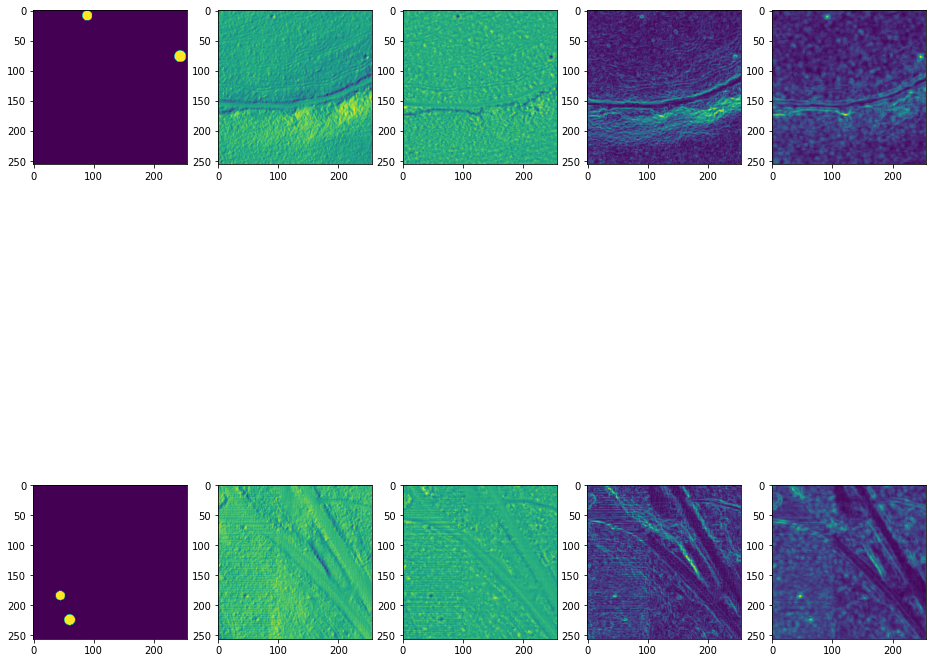

In [83]:
import glob
import matplotlib.pyplot as plt
import tifffile
plt.rcParams['figure.figsize'] = [16, 16]

labels = glob.glob('/workspace/data/hunting_pits/split_data/labels/*.tif')
hillshade = glob.glob('/workspace/data/hunting_pits/split_data/hillshade/*.tif')
hpmf = glob.glob('/workspace/data/hunting_pits/split_data/hpmf/*.tif')
slope = glob.glob('/workspace/data/hunting_pits/split_data/slope/*.tif')
stdon = glob.glob('/workspace/data/hunting_pits/split_data/stdon/*.tif')

f, axarr = plt.subplots(2,5)
axarr[1,0].imshow(tifffile.imread(labels[0]))
axarr[0,0].imshow(tifffile.imread(labels[2]))

axarr[1,1].imshow(tifffile.imread(hillshade[0]))
axarr[0,1].imshow(tifffile.imread(hillshade[2]))


axarr[1,2].imshow(tifffile.imread(hpmf[0]))
axarr[0,2].imshow(tifffile.imread(hpmf[2]))

axarr[1,3].imshow(tifffile.imread(slope[0]))
axarr[0,3].imshow(tifffile.imread(slope[2]))

axarr[1,4].imshow(tifffile.imread(stdon[0]))
axarr[0,4].imshow(tifffile.imread(stdon[2]))

**Charcoal kilns**

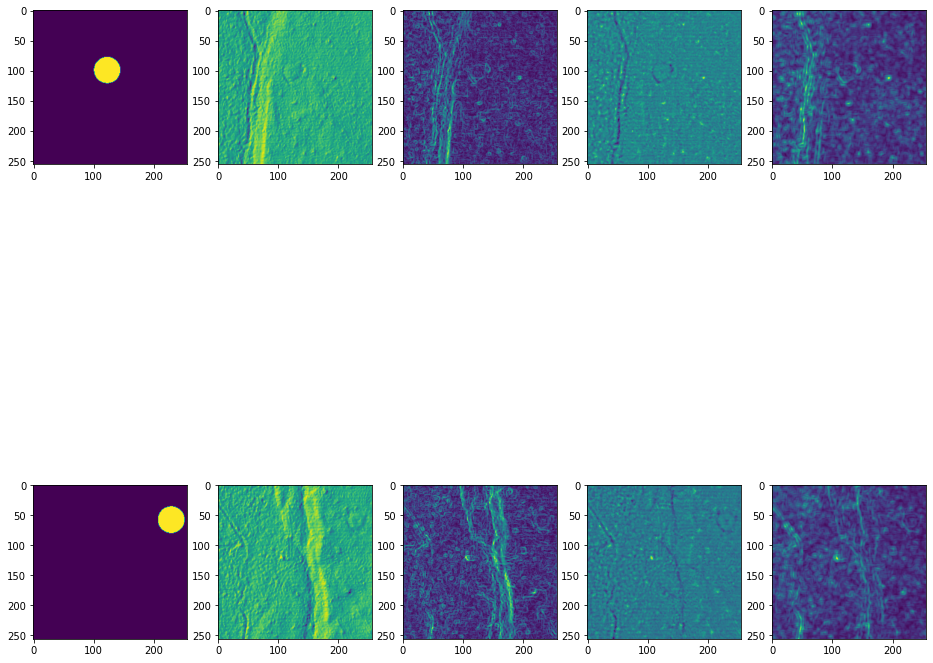

In [9]:
import glob
import matplotlib.pyplot as plt
import tifffile
plt.rcParams['figure.figsize'] = [16, 16]

labels = glob.glob('/workspace/data/charcoal_kilns/split_data/labels/*.tif')
hillshade = glob.glob('/workspace/data/charcoal_kilns/split_data/hillshade/*.tif')
hpmf = glob.glob('/workspace/data/charcoal_kilns/split_data/hpmf/*.tif')
slope = glob.glob('/workspace/data/charcoal_kilns/split_data/slope/*.tif')
stdon = glob.glob('/workspace/data/charcoal_kilns/split_data/stdon/*.tif')

f, axarr = plt.subplots(2,5)
axarr[1,0].imshow(tifffile.imread(labels[0]))
axarr[0,0].imshow(tifffile.imread(labels[2]))

axarr[1,1].imshow(tifffile.imread(hillshade[0]))
axarr[0,1].imshow(tifffile.imread(hillshade[2]))


axarr[1,2].imshow(tifffile.imread(hpmf[0]))
axarr[0,2].imshow(tifffile.imread(hpmf[2]))

axarr[1,3].imshow(tifffile.imread(slope[0]))
axarr[0,3].imshow(tifffile.imread(slope[2]))

axarr[1,4].imshow(tifffile.imread(stdon[0]))
axarr[0,4].imshow(tifffile.imread(stdon[2]))

# Evaluate U-net
## Train the model with only hillshade

**Hunting pits**

In [ ]:
!python /workspace/code/train.py -I /workspace/data/mariana/splitted_selected_512/HPMF/ /workspace/data/mariana/splitted_selected_512/labels/ /workspace/data/mariana/log5/ --seed=40 --epochs 100 --classes=0,1 --weighting=0.1,1

2022-05-28 19:23:29.784581: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
New Epoch
New Epoch
2022-05-28 19:23:30.836723: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-28 19:23:30.873014: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1079] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-28 19:23:30.873162: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1742] Found device 0 with properties: 
pciBusID: 0000:22:00.0 name: NVIDIA GeForce RTX 3070 computeCapability: 8.6
coreClock: 1.725GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-05-28 19:23:30.873177: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-05-28 19:23:30.874764: I tensorf

In [84]:
# log 4 is trained on only hillshade and seed 40
# log 11 is trained on only hillshade and seed 42
!python /workspace/code/train.py -I /workspace/data/hunting_pits/split_data/stdon/ /workspace/data/hunting_pits/split_data/labels/ /workspace/data/logfiles/hunting_log2/ --seed=42 --epochs 100 --weighting="0.1,1"

2022-05-19 17:04:32.916914: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
New Epoch
New Epoch
2022-05-19 17:04:33.766552: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-19 17:04:33.804067: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1079] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 17:04:33.804218: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1742] Found device 0 with properties: 
pciBusID: 0000:22:00.0 name: NVIDIA GeForce RTX 3070 computeCapability: 8.6
coreClock: 1.725GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-05-19 17:04:33.804234: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-05-19 17:04:33.806425: I tensorf

2022-05-19 17:04:40.624281: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: /workspace/data/logfiles/hunting_log2/train/plugins/profile/2022_05_19_17_04_40
2022-05-19 17:04:40.677049: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to /workspace/data/logfiles/hunting_log2/train/plugins/profile/2022_05_19_17_04_40/e1fadffa02b5.trace.json.gz
2022-05-19 17:04:40.689317: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-05-19 17:04:40.736476: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: /workspace/data/logfiles/hunting_log2/train/plugins/profile/2022_05_19_17_04_40
2022-05-19 17:04:40.743804: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for memory_profile.json.gz to /workspace/data/logfiles/hunting_log2/train/plugins/profile/2022_05_19_17_04_40/e1fadffa02b5.memory_profile.json.gz
2022-05-

<AxesSubplot:xlabel='epoch'>

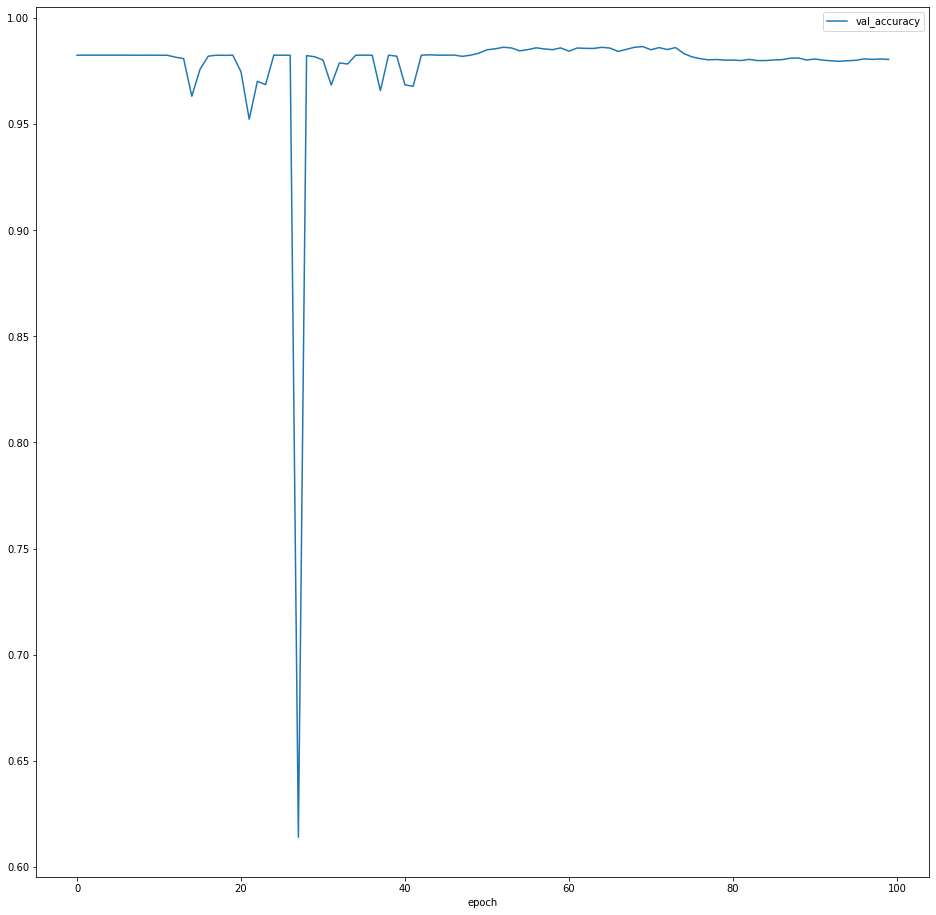

In [87]:
import pandas as pd
df = pd.read_csv('/workspace/data/logfiles/hunting_log2/log.csv', sep =';')
#df.head()
df.plot(x ='epoch', y='val_accuracy', kind = 'line')

In [90]:
import pandas as pd
#!python /workspace/code/evaluate_model.py -I /workspace/data/hunting_pits/split_data/stdon/ /workspace/data/hunting_pits/split_data/labels/ /workspace/data/logfiles/hunting_log2/trained.h5 /workspace/data/logfiles/hunting_log2/eval.csv --selected_imgs=/workspace/data/logfiles/hunting_log2/valid_imgs.txt --classes=0,1
#eval = pd.read_csv('/workspace/data/logfiles/hunting_log2/eval.csv')
#eval.describe()
eval = pd.read_csv('/workspace/data/logfiles/hunting_log2/eval.csv')
eval.describe()

0_fmes      0_acc      0_rec     0_jacc          0_tp         0_fp  \
count  94.000000  94.000000  94.000000  94.000000     94.000000    94.000000   
mean    0.993009   0.986342   0.994561   0.986166  64044.617021   544.500000   
std     0.005130   0.009887   0.007083   0.010077   1203.008515   616.509961   
min     0.979746   0.960297   0.964949   0.960297  60681.000000     0.000000   
25%     0.990496   0.981396   0.990968   0.981170  63329.250000    75.750000   
50%     0.994302   0.988808   0.997987   0.988668  64514.500000   287.500000   
75%     0.997263   0.994541   0.999996   0.994540  64825.500000   895.250000   
max     0.999756   0.999512   1.000000   0.999512  65504.000000  2602.000000   

              0_tn         0_fn     1_fmes      1_acc      1_rec     1_jacc  \
count    94.000000    94.000000  94.000000  94.000000  94.000000  94.000000   
mean    596.287234   350.595745   0.369354   0.986342   0.435817   0.280909   
std     787.085117   457.983855   0.331268   0.009887   0.393946   0.274167   
min       0.000000     0.000000   0.000000   0.960297   0.000000   0.000000   
25%       0.000000     0.250000   0.000000   0.981396   0.000000   0.000000   
50%     249.500000   128.500000   0.416769   0.988808   0.490976   0.263242   
75%     849.750000   589.000000   0.652379   0.994541   0.791037   0.484150   
max    3219.000000  2250.000000   0.947761   0.999512   1.000000   0.900709   

              1_tp         1_fp          1_tn         1_fn  
count    94.000000    94.000000     94.000000    94.000000  
mean    596.287234   350.595745  64044.617021   544.500000  
std     787.085117   457.983855   1203.008515   616.509961  
min       0.000000     0.000000  60681.000000     0.000000  
25%       0.000000     0.250000  63329.250000    75.750000  
50%     249.500000   128.500000  64514.500000   287.500000  
75%     849.750000   589.000000  64825.500000   895.250000  
max    3219.000000  2250.000000  65504.000000  2602.000000

**Charcoal kilns**

In [11]:
# log 4 is trained on only hillshade and seed 40
# log 11 is trained on only hillshade and seed 42
!python /workspace/code/train.py -I /workspace/data/charcoal_kilns/split_data/hillshade/ /workspace/data/charcoal_kilns/split_data/labels/ /workspace/data/charcoal_kilns/logs/log1/ --seed=42 --epochs 100 --weighting="0.1,1"

2022-05-31 13:58:55.427621: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
New Epoch
New Epoch
2022-05-31 13:58:56.217562: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-31 13:58:56.249060: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1079] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-31 13:58:56.249211: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1742] Found device 0 with properties: 
pciBusID: 0000:22:00.0 name: NVIDIA GeForce RTX 3070 computeCapability: 8.6
coreClock: 1.725GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-05-31 13:58:56.249227: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-05-31 13:58:56.251180: I tensorf

2022-05-31 13:59:03.035743: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: /workspace/data/charcoal_kilns/logs/log1/train/plugins/profile/2022_05_31_13_59_02
2022-05-31 13:59:03.099239: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to /workspace/data/charcoal_kilns/logs/log1/train/plugins/profile/2022_05_31_13_59_02/d189cb0f73a0.trace.json.gz
2022-05-31 13:59:03.113011: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-05-31 13:59:03.165329: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: /workspace/data/charcoal_kilns/logs/log1/train/plugins/profile/2022_05_31_13_59_02
2022-05-31 13:59:03.172721: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for memory_profile.json.gz to /workspace/data/charcoal_kilns/logs/log1/train/plugins/profile/2022_05_31_13_59_02/d189cb0f73a0.memory_profile.json

<AxesSubplot:xlabel='epoch'>

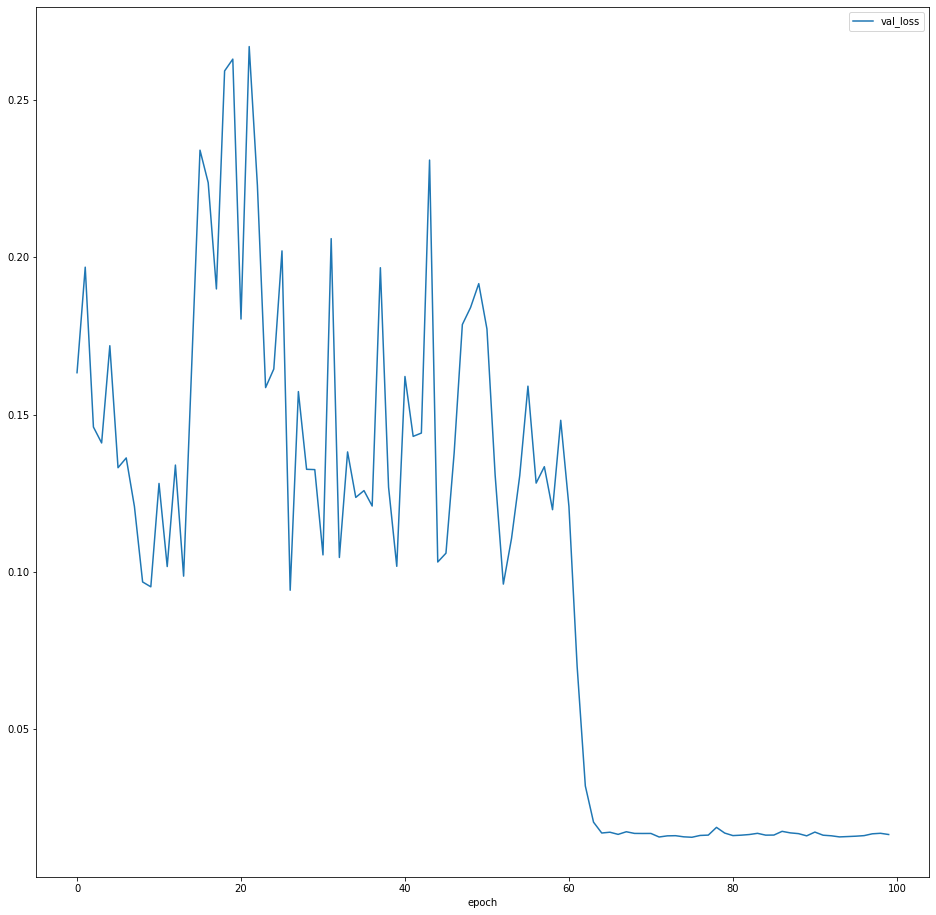

In [18]:
import pandas as pd
df = pd.read_csv('/workspace/data/charcoal_kilns/logs/log1/log.csv', sep =';')
#df.head()
df.plot(x ='epoch', y='val_loss', kind = 'line')

## Evaluate the model on evaluation data

In [76]:
!python /workspace/code/evaluate_model.py -I /workspace/data/charcoal_kilns/split_data/hillshade/ /workspace/data/charcoal_kilns/split_data/labels/ /workspace/data/charcoal_kilns/logs/log1/trained.h5 /workspace/data/charcoal_kilns/logs/log1/eval.csv --selected_imgs=/workspace/data/charcoal_kilns/logs/log1/valid_imgs.txt --classes=0,1
eval = pd.read_csv('/workspace/data/charcoal_kilns/logs/log1/eval.csv')
eval.describe()

2022-05-17 18:24:59.812359: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
New Epoch
2022-05-17 18:25:00.806942: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-17 18:25:00.842038: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1079] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-17 18:25:00.842186: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1742] Found device 0 with properties: 
pciBusID: 0000:22:00.0 name: NVIDIA GeForce RTX 3070 computeCapability: 8.6
coreClock: 1.725GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-05-17 18:25:00.842203: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-05-17 18:25:00.844376: I tensorflow/stream

0_fmes      0_acc      0_rec     0_jacc          0_tp         0_fp  \
count  51.000000  51.000000  51.000000  51.000000     51.000000    51.000000   
mean    0.997390   0.994869   0.997260   0.994801  64263.372549   160.627451   
std     0.002033   0.004016   0.002883   0.004030    685.035385   292.236066   
min     0.989374   0.978973   0.988707   0.978971  62251.000000     0.000000   
25%     0.996965   0.994003   0.995791   0.993949  63929.500000     2.500000   
50%     0.997818   0.995728   0.997876   0.995645  64034.000000    41.000000   
75%     0.998595   0.997223   1.000000   0.997195  64748.500000   135.500000   
max     0.999870   0.999741   1.000000   0.999741  65519.000000  1378.000000   

              0_tn        0_fn     1_fmes      1_acc      1_rec     1_jacc  \
count    51.000000   51.000000  51.000000  51.000000  51.000000  51.000000   
mean    936.352941  175.647059   0.652714   0.994869   0.698435   0.593607   
std     677.127427  184.474911   0.403286   0.004016   0.435403   0.373012   
min       0.000000    0.000000   0.000000   0.978973   0.000000   0.000000   
25%      10.000000    0.000000   0.050651   0.994003   0.025986   0.025986   
50%    1240.000000  136.000000   0.886884   0.995728   0.964772   0.796757   
75%    1363.500000  270.000000   0.923255   0.997223   0.997217   0.857451   
max    2743.000000  731.000000   0.976168   0.999741   1.000000   0.953445   

              1_tp        1_fp          1_tn         1_fn  
count    51.000000   51.000000     51.000000    51.000000  
mean    936.352941  175.647059  64263.372549   160.627451  
std     677.127427  184.474911    685.035385   292.236066  
min       0.000000    0.000000  62251.000000     0.000000  
25%      10.000000    0.000000  63929.500000     2.500000  
50%    1240.000000  136.000000  64034.000000    41.000000  
75%    1363.500000  270.000000  64748.500000   135.500000  
max    2743.000000  731.000000  65519.000000  1378.000000

## Inference

In [19]:
!python /workspace/code/inference.py -I /workspace/data/charcoal_kilns/test_chip/ /workspace/data/charcoal_kilns/logs/log1/trained.h5 /workspace/data/charcoal_kilns/inference/ --tile_size=256 --class_num=2

2022-05-31 14:14:51.292611: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-05-31 14:14:52.026461: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-31 14:14:52.062132: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1079] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-31 14:14:52.062284: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1742] Found device 0 with properties: 
pciBusID: 0000:22:00.0 name: NVIDIA GeForce RTX 3070 computeCapability: 8.6
coreClock: 1.725GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-05-31 14:14:52.062307: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-05-31 14:14:52.064120: I tensorflow/stream_executor/

## Train on high pass median filter

In [72]:
# log 10 is hpmf
!python /workspace/code/train.py -I /workspace/data/split_data/hpmf/ /workspace/data/split_data/labels/ /workspace/data/logfiles/log10/ --seed=42 --epochs 100 --weighting="0.1,1"



2022-05-17 17:51:35.412875: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
New Epoch
New Epoch
2022-05-17 17:51:36.205347: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-17 17:51:36.241227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1079] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-17 17:51:36.241370: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1742] Found device 0 with properties: 
pciBusID: 0000:22:00.0 name: NVIDIA GeForce RTX 3070 computeCapability: 8.6
coreClock: 1.725GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-05-17 17:51:36.241387: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-05-17 17:51:36.243599: I tensorf

2022-05-17 17:51:43.729924: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: /workspace/data/logfiles/log10/train/plugins/profile/2022_05_17_17_51_43
2022-05-17 17:51:43.789340: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to /workspace/data/logfiles/log10/train/plugins/profile/2022_05_17_17_51_43/aa9136e9245b.trace.json.gz
2022-05-17 17:51:43.802736: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-05-17 17:51:43.853064: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: /workspace/data/logfiles/log10/train/plugins/profile/2022_05_17_17_51_43
2022-05-17 17:51:43.860723: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for memory_profile.json.gz to /workspace/data/logfiles/log10/train/plugins/profile/2022_05_17_17_51_43/aa9136e9245b.memory_profile.json.gz
2022-05-17 17:51:43.876144: I tensor

## Evaluate hpmf

In [73]:
!python /workspace/code/evaluate_model.py -I /workspace/data/split_data/hpmf/ /workspace/data/split_data/labels/ /workspace/data/logfiles/log10/trained.h5 /workspace/data/logfiles/log10/eval.csv --selected_imgs=/workspace/data/logfiles/log10/valid_imgs.txt --classes=0,1
eval = pd.read_csv('/workspace/data/logfiles/log10/eval.csv')
eval.describe()

2022-05-17 17:58:20.578997: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
New Epoch
2022-05-17 17:58:21.647325: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-17 17:58:21.681398: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1079] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-17 17:58:21.681547: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1742] Found device 0 with properties: 
pciBusID: 0000:22:00.0 name: NVIDIA GeForce RTX 3070 computeCapability: 8.6
coreClock: 1.725GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-05-17 17:58:21.681563: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-05-17 17:58:21.683724: I tensorflow/stream

0_fmes      0_acc      0_rec     0_jacc          0_tp         0_fp  \
count  51.000000  51.000000  51.000000  51.000000     51.000000    51.000000   
mean    0.995615   0.991417   0.994202   0.991297  64066.823529   190.294118   
std     0.003809   0.007438   0.006452   0.007518    820.009188   366.119068   
min     0.985299   0.971024   0.973524   0.971024  61499.000000     0.000000   
25%     0.993924   0.988152   0.991980   0.987921  63760.500000     1.500000   
50%     0.996959   0.994064   0.996439   0.993937  63999.000000    36.000000   
75%     0.998504   0.997047   0.999312   0.997013  64626.000000   152.500000   
max     0.999870   0.999741   1.000000   0.999741  65519.000000  1514.000000   

              0_tn         0_fn     1_fmes      1_acc      1_rec     1_jacc  \
count    51.000000    51.000000  51.000000  51.000000  51.000000  51.000000   
mean    906.686275   372.196078   0.636069   0.991417   0.710771   0.552311   
std     666.526473   413.009831   0.363599   0.007438   0.412341   0.332272   
min       0.000000     0.000000   0.000000   0.971024   0.000000   0.000000   
25%     201.000000    44.500000   0.597055   0.988152   0.506105   0.426595   
50%    1057.000000   228.000000   0.783767   0.994064   0.961569   0.644421   
75%    1350.000000   516.000000   0.905938   0.997047   0.998921   0.828123   
max    2766.000000  1695.000000   0.948887   0.999741   1.000000   0.902745   

              1_tp         1_fp          1_tn         1_fn  
count    51.000000    51.000000     51.000000    51.000000  
mean    906.686275   372.196078  64066.823529   190.294118  
std     666.526473   413.009831    820.009188   366.119068  
min       0.000000     0.000000  61499.000000     0.000000  
25%     201.000000    44.500000  63760.500000     1.500000  
50%    1057.000000   228.000000  63999.000000    36.000000  
75%    1350.000000   516.000000  64626.000000   152.500000  
max    2766.000000  1695.000000  65519.000000  1514.000000

## Train Slope

2022-05-17 17:38:38.721164: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
New Epoch
New Epoch
2022-05-17 17:38:39.507344: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-17 17:38:39.545301: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1079] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-17 17:38:39.545442: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1742] Found device 0 with properties: 
pciBusID: 0000:22:00.0 name: NVIDIA GeForce RTX 3070 computeCapability: 8.6
coreClock: 1.725GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-05-17 17:38:39.545459: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-05-17 17:38:39.547483: I tensorf

2022-05-17 17:38:47.016051: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: /workspace/data/logfiles/log9/train/plugins/profile/2022_05_17_17_38_46
2022-05-17 17:38:47.071488: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to /workspace/data/logfiles/log9/train/plugins/profile/2022_05_17_17_38_46/aa9136e9245b.trace.json.gz
2022-05-17 17:38:47.084562: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-05-17 17:38:47.133729: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: /workspace/data/logfiles/log9/train/plugins/profile/2022_05_17_17_38_46
2022-05-17 17:38:47.141792: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for memory_profile.json.gz to /workspace/data/logfiles/log9/train/plugins/profile/2022_05_17_17_38_46/aa9136e9245b.memory_profile.json.gz
2022-05-17 17:38:47.157930: I tensorflow

<AxesSubplot:xlabel='epoch'>

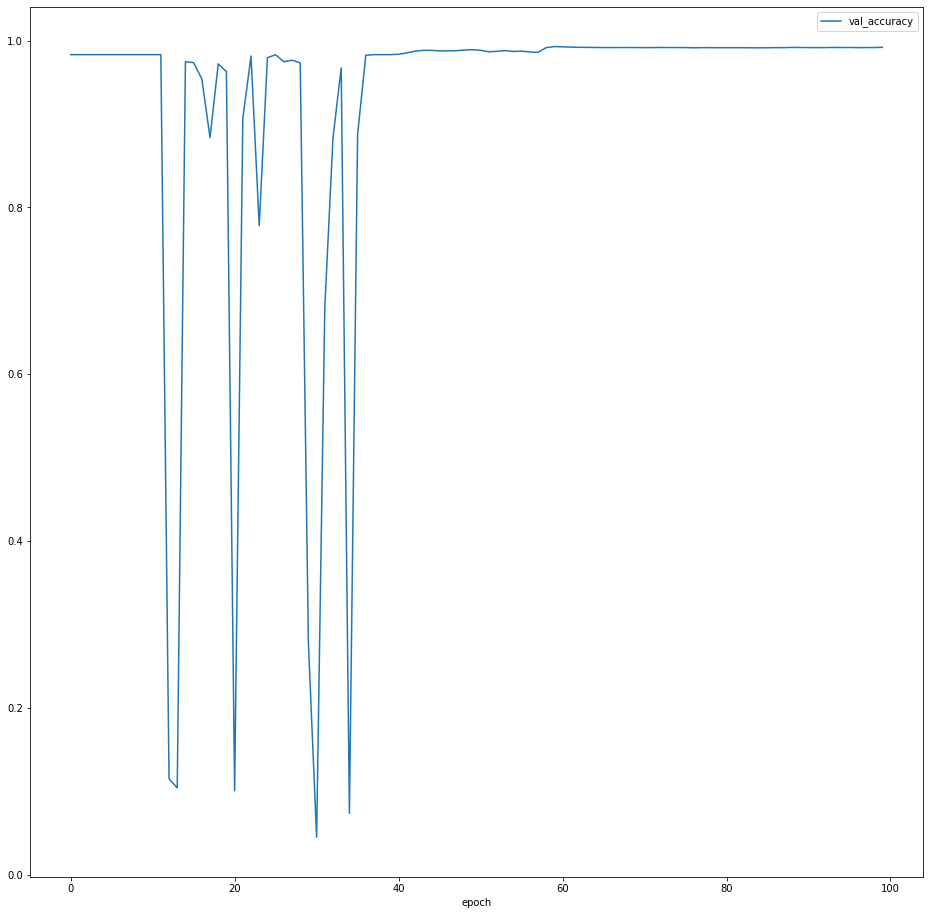

In [69]:
# log 8 is slope
!python /workspace/code/train.py -I /workspace/data/split_data/slope/ /workspace/data/split_data/labels/ /workspace/data/logfiles/log9/ --seed=42 --epochs 100 --weighting="0.1,1"
import pandas as pd
df = pd.read_csv('/workspace/data/logfiles/log9/log.csv', sep =';')
#df.head()
df.plot(x ='epoch', y='val_accuracy', kind = 'line')

## Evaluate slope

In [70]:
!python /workspace/code/evaluate_model.py -I /workspace/data/split_data/slope/ /workspace/data/split_data/labels/ /workspace/data/logfiles/log9/trained.h5 /workspace/data/logfiles/log9/eval.csv --selected_imgs=/workspace/data/logfiles/log9/valid_imgs.txt --classes=0,1
eval = pd.read_csv('/workspace/data/logfiles/log9/eval.csv')
eval.describe()

2022-05-17 17:46:09.974556: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
New Epoch
2022-05-17 17:46:11.057882: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-17 17:46:11.093703: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1079] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-17 17:46:11.093851: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1742] Found device 0 with properties: 
pciBusID: 0000:22:00.0 name: NVIDIA GeForce RTX 3070 computeCapability: 8.6
coreClock: 1.725GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-05-17 17:46:11.093866: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-05-17 17:46:11.096190: I tensorflow/stream

0_fmes      0_acc      0_rec     0_jacc          0_tp         0_fp  \
count  51.000000  51.000000  51.000000  51.000000     51.000000    51.000000   
mean    0.996391   0.992925   0.995761   0.992823  64167.313725   191.980392   
std     0.002816   0.005498   0.005193   0.005572    783.760996   331.666066   
min     0.987221   0.975281   0.976178   0.974764  61791.000000     0.000000   
25%     0.995827   0.991768   0.993300   0.991689  63823.500000     0.000000   
50%     0.996847   0.993759   0.996960   0.993713  64021.000000    39.000000   
75%     0.998398   0.996841   0.999992   0.996802  64660.000000   185.500000   
max     0.999870   0.999741   1.000000   0.999741  65519.000000  1379.000000   

              0_tn         0_fn     1_fmes      1_acc      1_rec     1_jacc  \
count    51.000000    51.000000  51.000000  51.000000  51.000000  51.000000   
mean    905.000000   271.705882   0.607847   0.992925   0.673607   0.536670   
std     688.369465   331.854805   0.395203   0.005498   0.443689   0.361755   
min       0.000000     0.000000   0.000000   0.975281   0.000000   0.000000   
25%      18.000000     0.500000   0.061223   0.991768   0.032300   0.031603   
50%    1245.000000   195.000000   0.838172   0.993759   0.960643   0.721424   
75%    1353.000000   431.500000   0.906075   0.996841   1.000000   0.828314   
max    2766.000000  1527.000000   0.964366   0.999741   1.000000   0.931184   

              1_tp         1_fp          1_tn         1_fn  
count    51.000000    51.000000     51.000000    51.000000  
mean    905.000000   271.705882  64167.313725   191.980392  
std     688.369465   331.854805    783.760996   331.666066  
min       0.000000     0.000000  61791.000000     0.000000  
25%      18.000000     0.500000  63823.500000     0.000000  
50%    1245.000000   195.000000  64021.000000    39.000000  
75%    1353.000000   431.500000  64660.000000   185.500000  
max    2766.000000  1527.000000  65519.000000  1379.000000

## Train on all bands combined

In [77]:
!python /workspace/code/train.py -I /workspace/data/split_data/hillshade/ -I /workspace/data/split_data/slope/ -I /workspace/data/split_data/hpmf/ /workspace/data/split_data/labels/ /workspace/data/logfiles/log12/ --seed=42 --epochs 100 --weighting="0.1,1"

2022-05-17 18:27:27.973449: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
New Epoch
New Epoch
2022-05-17 18:27:29.216588: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-17 18:27:29.253316: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1079] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-17 18:27:29.253458: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1742] Found device 0 with properties: 
pciBusID: 0000:22:00.0 name: NVIDIA GeForce RTX 3070 computeCapability: 8.6
coreClock: 1.725GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-05-17 18:27:29.253474: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-05-17 18:27:29.255647: I tensorf

2022-05-17 18:27:36.702950: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: /workspace/data/logfiles/log12/train/plugins/profile/2022_05_17_18_27_36
2022-05-17 18:27:36.756666: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to /workspace/data/logfiles/log12/train/plugins/profile/2022_05_17_18_27_36/aa9136e9245b.trace.json.gz
2022-05-17 18:27:36.770020: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-05-17 18:27:36.818902: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: /workspace/data/logfiles/log12/train/plugins/profile/2022_05_17_18_27_36
2022-05-17 18:27:36.825933: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for memory_profile.json.gz to /workspace/data/logfiles/log12/train/plugins/profile/2022_05_17_18_27_36/aa9136e9245b.memory_profile.json.gz
2022-05-17 18:27:36.838257: I tensor

## Evaluate on all bands

In [78]:
!python /workspace/code/evaluate_model.py -I /workspace/data/split_data/hillshade/ -I /workspace/data/split_data/slope/ -I /workspace/data/split_data/hpmf/ /workspace/data/split_data/labels/ /workspace/data/logfiles/log12/trained.h5 /workspace/data/logfiles/log12/eval.csv --selected_imgs=/workspace/data/logfiles/log12/valid_imgs.txt --classes=0,1
eval = pd.read_csv('/workspace/data/logfiles/log12/eval.csv')
eval.describe()

2022-05-17 18:34:57.034043: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
New Epoch
2022-05-17 18:34:58.086466: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-17 18:34:58.121626: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1079] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-17 18:34:58.121771: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1742] Found device 0 with properties: 
pciBusID: 0000:22:00.0 name: NVIDIA GeForce RTX 3070 computeCapability: 8.6
coreClock: 1.725GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-05-17 18:34:58.121787: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-05-17 18:34:58.123873: I tensorflow/stream

0_fmes      0_acc      0_rec     0_jacc          0_tp         0_fp  \
count  51.000000  51.000000  51.000000  51.000000     51.000000    51.000000   
mean    0.997062   0.994242   0.995358   0.994151  64140.549020    78.901961   
std     0.002262   0.004443   0.003902   0.004479    683.202293   222.748670   
min     0.988314   0.976898   0.985240   0.976898  62114.000000     0.000000   
25%     0.996269   0.992729   0.992969   0.992565  63843.500000     0.000000   
50%     0.997622   0.995346   0.996119   0.995255  63979.000000     5.000000   
75%     0.998532   0.997078   0.998497   0.997069  64549.000000    75.500000   
max     0.999870   0.999741   1.000000   0.999741  65519.000000  1514.000000   

              0_tn        0_fn     1_fmes      1_acc      1_rec     1_jacc  \
count    51.000000   51.000000  51.000000  51.000000  51.000000  51.000000   
mean   1018.078431  298.470588   0.734463   0.994242   0.809256   0.649616   
std     621.524540  251.086866   0.310662   0.004443   0.354823   0.290961   
min       0.000000    0.000000   0.000000   0.976898   0.000000   0.000000   
25%     637.500000   97.000000   0.765589   0.992729   0.936028   0.620237   
50%    1248.000000  249.000000   0.860165   0.995346   0.995987   0.754639   
75%    1379.500000  451.500000   0.899350   0.997078   1.000000   0.817108   
max    2763.000000  962.000000   0.974898   0.999741   1.000000   0.951026   

              1_tp        1_fp          1_tn         1_fn  
count    51.000000   51.000000     51.000000    51.000000  
mean   1018.078431  298.470588  64140.549020    78.901961  
std     621.524540  251.086866    683.202293   222.748670  
min       0.000000    0.000000  62114.000000     0.000000  
25%     637.500000   97.000000  63843.500000     0.000000  
50%    1248.000000  249.000000  63979.000000     5.000000  
75%    1379.500000  451.500000  64549.000000    75.500000  
max    2763.000000  962.000000  65519.000000  1514.000000

In [80]:
eval = pd.read_csv('/workspace/data/logfiles/log11/eval.csv')
eval.describe()

0_fmes      0_acc      0_rec     0_jacc          0_tp         0_fp  \
count  51.000000  51.000000  51.000000  51.000000     51.000000    51.000000   
mean    0.997390   0.994869   0.997260   0.994801  64263.372549   160.627451   
std     0.002033   0.004016   0.002883   0.004030    685.035385   292.236066   
min     0.989374   0.978973   0.988707   0.978971  62251.000000     0.000000   
25%     0.996965   0.994003   0.995791   0.993949  63929.500000     2.500000   
50%     0.997818   0.995728   0.997876   0.995645  64034.000000    41.000000   
75%     0.998595   0.997223   1.000000   0.997195  64748.500000   135.500000   
max     0.999870   0.999741   1.000000   0.999741  65519.000000  1378.000000   

              0_tn        0_fn     1_fmes      1_acc      1_rec     1_jacc  \
count    51.000000   51.000000  51.000000  51.000000  51.000000  51.000000   
mean    936.352941  175.647059   0.652714   0.994869   0.698435   0.593607   
std     677.127427  184.474911   0.403286   0.004016   0.435403   0.373012   
min       0.000000    0.000000   0.000000   0.978973   0.000000   0.000000   
25%      10.000000    0.000000   0.050651   0.994003   0.025986   0.025986   
50%    1240.000000  136.000000   0.886884   0.995728   0.964772   0.796757   
75%    1363.500000  270.000000   0.923255   0.997223   0.997217   0.857451   
max    2743.000000  731.000000   0.976168   0.999741   1.000000   0.953445   

              1_tp        1_fp          1_tn         1_fn  
count    51.000000   51.000000     51.000000    51.000000  
mean    936.352941  175.647059  64263.372549   160.627451  
std     677.127427  184.474911    685.035385   292.236066  
min       0.000000    0.000000  62251.000000     0.000000  
25%      10.000000    0.000000  63929.500000     2.500000  
50%    1240.000000  136.000000  64034.000000    41.000000  
75%    1363.500000  270.000000  64748.500000   135.500000  
max    2743.000000  731.000000  65519.000000  1378.000000

## Evaluate the final model on test chips

In [ ]:
!python /workspace/code/evaluate_model2.py ../data/TPI_splitted_100px/labels/ ../log/trained.h5 ../log/eval_auto_weight.csv -I ../data/TPI_splitted_100px/hpmf/ -I ../data/TPI_splitted_100px/hillshade45/ --classes 0,1

## Run inference

In [ ]:
python process_img_new_extent.py ../log/trained.h5 ../log/ -I ../data/TPI_splitted_100px/hpmf/1110.tif -I ../data/TPI_splitted_100px/hillshade45/1110.tif --tile_size 500

#  Convert segmentations to bounding boxes

Create new label chips where each object has its own ID

In [114]:
!python /workspace/code/utils/create_labels.py

^C
Unexpected error: <class 'KeyboardInterrupt'>
Traceback (most recent call last):
  File "/workspace/code/utils/create_labels.py", line 4, in <module>


In [98]:
!pip install torch
!pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 7.5 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 67.8 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [112]:
!python /workspace/code/masks_to_boxes.py /workspace/temp/ /workspace/data/hunting_pits/split_data/labels/ /workspace/data/hunting_pits/object_detection_data/box_labels/ 

tensor([[ 38., 176.,  69., 232.]])
tensor([[148., 234., 165., 251.]])
tensor([[ 82.,   1., 253.,  85.]])
tensor([[ 32.,  13., 167., 216.]])
tensor([[ 66.,  31., 148., 148.]])
tensor([[178.,  51., 192.,  64.]])
tensor([[100., 214., 113., 227.]])
tensor([[100.,  24., 113.,  37.]])
tensor([[138., 208., 175., 255.]])
tensor([[ 96.,   0., 160., 255.]])
tensor([[145.,   0., 241., 112.]])
tensor([[111., 136., 197., 164.]])
tensor([[ 28.,  27.,  51., 221.]])
tensor([[233., 133., 251., 152.]])
tensor([[ 81., 210.,  98., 227.]])
tensor([[  4.,  21.,  29., 240.]])
tensor([[247., 242., 255., 255.]])
tensor([[  0., 190., 190., 255.]])
tensor([[ 62., 200., 199., 222.]])
tensor([[228.,  33., 252., 134.]])
tensor([[133.,  34., 255.,  61.]])
tensor([[  0.,   0., 255.,  60.]])
tensor([[0., 0., 8., 4.]])
tensor([[140.,  36., 159.,  55.]])
tensor([[ 67., 109., 176., 247.]])
tensor([[177.,  17., 199.,  39.]])
tensor([[112.,  99., 126., 113.]])
tensor([[ 46.,  84.,  77., 103.]])
tensor([[236., 151., 253., 1

tensor([[  0., 151., 131., 255.]])
tensor([[108.,   0., 199.,  51.]])
tensor([[10., 62., 43., 95.]])
tensor([[ 32., 109., 238., 147.]])
tensor([[155., 232., 188., 255.]])
tensor([[ 17., 225.,  51., 255.]])
tensor([[132., 228., 255., 255.]])
tensor([[  0., 176., 241., 255.]])
tensor([[ 10., 137.,  43., 171.]])
tensor([[ 81., 165., 169., 252.]])
tensor([[ 15.,  91., 200., 204.]])
tensor([[ 77.,   0., 187., 143.]])
tensor([[ 26.,   0., 193.,  49.]])
tensor([[117.,   0., 255.,  95.]])
tensor([[  0.,   0., 247., 166.]])
tensor([[ 51.,  62., 255., 255.]])
tensor([[ 0., 58., 26., 92.]])
tensor([[52.,  0., 83., 11.]])
tensor([[ 79.,  97., 254., 243.]])
tensor([[  5.,  93.,  38., 126.]])
tensor([[60., 31., 93., 64.]])
tensor([[ 27.,  74.,  61., 107.]])
tensor([[249., 179., 255., 206.]])
tensor([[  0.,  37., 236., 209.]])
tensor([[  0., 109.,  14., 143.]])
tensor([[104., 144., 255., 238.]])
tensor([[  0., 148.,   5., 173.]])
tensor([[232., 170., 255., 203.]])
tensor([[  0., 172.,   9., 202.]])
t

# The Moon
## Data description

Impact creaters from the moon were used to pre-train the model. These creaters were digitised by NASA and are avalible from the Moon Crater Database v1 Robbins:https://astrogeology.usgs.gov/search/map/Moon/Research/Craters/lunar_crater_database_robbins_2018 The database contains approximately 1.3 million lunar impact craters and is approximately complete for all craters larger than about 1–2 km in diameter. Craters were manually identified and measured on Lunar Reconnaissance Orbiter (LRO) Camera (LROC) Wide-Angle Camera (WAC) images, in LRO Lunar Orbiter Laser Altimeter (LOLA) topography, SELENE Kaguya Terrain Camera (TC) images, and a merged LOLA+TC DTM.


The Moon LRO LOLA DEM 118m v1 was used as digital elevation model. This digital elevation model  is based on data from the Lunar Orbiter Laser Altimeter, an instrument on the National Aeronautics and Space Agency (NASA) Lunar Reconnaissance Orbiter (LRO) spacecraft. The created DEM represents more than 6.5 billion measurements gathered between July 2009 and July 2013, adjusted for consistency in the coordinate system described below, and then converted to lunar radii.
Source: https://astrogeology.usgs.gov/search/details/Moon/LRO/LOLA/Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014/cub

## Creater selection
The average diameter of charcoal kilns in the trainig data was 21 meter with a standard deviation of +- 1.97 meter. Therefore creaters that were less than 19 meter were excluded. creaters larger than 23 meters were also excluded. It is possible that large creaters can be resampled down to 21 meter if they can be isolated.

one pixel is 118 m so we are interested in craters between 2242 meter and 3776 meter.

In [5]:
import geopandas as gpd
all_creaters = gpd.read_file('/workspace/data/lunar_data/Catalog_Moon_Release_20180815_shapefile180/Catalog_Moon_Release_20180815_1kmPlus_180.shp')

In [39]:
print(len(all_creaters))

1296796


In [87]:
#raw_data = gpd.read_file(original_craters)
def select_and_buffer(all_creaters, buffered_craters):
    raw_data = gpd.read_file(all_creaters)
    select = raw_data[(raw_data['DIAM_C_IM'].between(2.2, 3.8))]
    select['diameter_meter'] = select['DIAM_C_IM']/50 # I use 50 instead of 100 to get a slightly bigger buffer polygon
    print(len(select))
    # buffer points with field
    buffered_craters = select.buffer(distance=select['diameter_meter'])
    buffered_craters.to_file(all_creaters)
    
select_and_buffer('/workspace/data/lunar_data/Catalog_Moon_Release_20180815_shapefile180/Catalog_Moon_Release_20180815_1kmPlus_180.shp','/workspace/data/lunar_data/test50.shp')

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
<ipython-input-87-91c4d2f2a747>:8: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_craters = select.buffer(distance=select['diameter_meter'])


236427


/usr/local/lib/python3.8/dist-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


AttributeError: 'GeoSeries' object has no attribute 'iterrows'

In [ ]:
def buffer(row):
    return row.geometry.buffer(row.bufferid)

def select_craters(original_craters, selected_craters):
    raw_data = gpd.read_file(original_craters)
    select = raw_data[(raw_data['DIAM_C_IM'].between(2.2, 3.8))]
    
    #select.to_file(selected_craters)
    buffered = select.copy()
    buffered['geometry'] = buffered.apply(buffer, axis = 1)
    selected_craters = []
    for n, p in enumerate(buffered[:-1],1):
        if not any(p.overlaps(g) for g in buffered[n:]):
            non_overlapping_craters.append(str(p))
    print(len(selected_craters))   
select_creaters('/workspace/data/lunar_data/Catalog_Moon_Release_20180815_shapefile180/Catalog_Moon_Release_20180815_1kmPlus_180.shp')

In [40]:
selected_creaters = all_creaters[all_creaters['DIAM_C_IM'].between(2.2, 3.8)]
print(len(selected_creaters))
#selected_creaters.head()
# 1 pixel = 118 m
# DIAM_C_IM = m
# 38 pixels = 18

236427


In [18]:
selected_creaters['DIAM_C_IM'].describe()

count    7587.000000
mean       41.801468
std        55.341096
min        19.003900
25%        22.680150
50%        29.433600
75%        44.651350
max      2491.870000
Name: DIAM_C_IM, dtype: float64

## Convert Lunar data to training data
We can use the same method as before to convert the topographical data and field data to image chips that can be used for training. First we split the moon  

In [9]:
!python /workspace/code/create_labels.py /workspace/data/lunar_data/dem/ /workspace/data/lunar_data/Catalog_Moon_Release_20180815_shapefile180/Catalog_Moon_Release_20180815_1kmPlus_180.shp /workspace/data/lunar_data/labeled_moon/

./whitebox_tools --run="VectorPolygonsToRaster" --input='/workspace/data/lunar_data/Catalog_Moon_Release_20180815_shapefile180/Catalog_Moon_Release_20180815_1kmPlus_180.shp' --field=class --output='/workspace/data/lunar_data/labeled_moon/Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014.tif' --base='/workspace/data/lunar_data/dem/Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
thread 'main' panicked at 'The input vector data must be of polygon base shape type.', whitebox-tools-app/src/main.rs:72:21
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


In [ ]:
fgrop 15-17